In [1]:
%matplotlib inline

import IPython.core.debugger
dbg = IPython.core.debugger.Pdb()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statistics import median, mean
from pprint import pprint
import sys
from glob import glob

from ipywidgets import interact, interactive, fixed, interact_manual, widgets
from IPython.display import display

CALLERS = ['strelka2', 'vardict', 'mutect2']

CALLER = 'strelka2'
venn_field = 'caller'
#venn_left = 'strelka2'
#venn_right = 'ensemble'
venn_left = 'vardict'
venn_right = 'strelka2'
vl = venn_left
vr = venn_right
l = vl[0]
r = vr[0]

benchmark_d = {
    'mb_100v100': {
        'src_vcf': 'batch1-{c}-annotated.vcf.gz',
        'bench': 'mb',
    },
    'mb_300v50': {
        'src_vcf': 'MB_300vs50-{c}-annotated.vcf.gz',
        'bench': 'mb',
    },
    'colo_40pc_ds': {
        'src_vcf': 'COLO829_40pc_ds-{c}.vcf.gz',
        'bench': 'colo',
    },
    'colo_40pc_full': {
        'src_vcf': 'COLO829_40pc-{c}.vcf.gz',
        'bench': 'colo',
    },
    'colo_tgen': {
        'src_vcf': 'COLO_TGEN_bwa-{c}.vcf.gz',
        'bench': 'colo',
    },
    'colo_hoffman': {
        'src_vcf': 'COLO829_40pc-{c}.vcf.gz',
        'bench': 'colo',
    },
}
for n, d in benchmark_d.items():
    d['name'] = n
    d['df'] = None
    d['eval_dir'] = f'{n}/evalled'
    d['vcf_glob'] = f'{d["eval_dir"]}/anno_gnomad/*{{c}}*/*{{c}}*.vcf.gz'
    d['truth_vcf'] = f'{d["eval_dir"]}/anno_gnomad/truth_variants.vcf.gz'
MinEVS = 6

In [ ]:
from ngs_utils.file_utils import add_suffix, file_exists, splitext_plus, intermediate_fname
from os.path import basename, splitext, dirname, join

def _load(n):
    d = benchmark_d[n]
#    print(f'Benchmarking VCFs for {n}')
    vcfs = []
    eval_dir = f'{n}/evalled'
    vcfprep_dir = f'{n}/vcfprep'
    !mkdir -p {vcfprep_dir}
    for c in CALLERS:
        vcf = join(n, d['src_vcf'].format(c=c))
        if file_exists(vcf):
#             vcf_pass = intermediate_fname(vcfprep_dir, vcf, 'pass')
#             if not file_exists(vcf_pass):
#                 cmd = f'bcftools view -f.,PASS {vcf} -Oz -o {vcf_pass} && tabix -p vcf {vcf_pass}'
#                 print(cmd)
#                 !{cmd}
#             vcf_prep = intermediate_fname(vcfprep_dir, vcf, 'prep')
#             if not file_exists(vcf_prep):
#                 cmd = f'pcgr_prep {vcf_pass} | bcftools view -f.,PASS -Oz -o {vcf_prep} && tabix -p vcf {vcf_prep}'
#                 print(cmd)
#                 !{cmd}
#             vcf_pon = intermediate_fname(vcfprep_dir, vcf, 'pon')
#             if not file_exists(vcf_pon):
#                 cmd = f'pon_anno {vcf_prep} -o {vcf_pon} && tabix -p vcf {vcf_pon}'
#                 print(cmd)
#                 !{cmd}
            vcfs.append(vcf)
#             vcf_basename = splitext_plus(basename(vcf_pon))[0]
#             d['isec_dir'] = f'{eval_dir}/eval/{vcf_basename}_bcftools_isec'.replace(c, '{c}')

    if vcfs:
        cmd = f"eval_vcf {d['bench']} {' '.join(vcfs)} -o {eval_dir} --anno-tricky --anno-dp-af --anno-pon --anno-gnomad"
        print(cmd)
        # !{cmd}

    for c in CALLERS:
        vcf_glob = glob(d['vcf_glob'].format(c=c))
        if vcf_glob:
            vcf = vcf_glob[0]
            print(f'  pcgr\'ing {vcf}')
            !pcgr {vcf} -o {splitext_plus(vcf)[0]}_pcgr

#for n, d in benchmark_d.items(): 
_load('mb_100v100')
#_load('colo_40pc_ds')
#_load('colo_hoffman')
#_load('colo_40pc_full')
_load('colo_tgen')
_load('mb_300v50')

eval_vcf mb mb_100v100/batch1-strelka2-annotated.vcf.gz mb_100v100/batch1-vardict-annotated.vcf.gz mb_100v100/batch1-mutect2-annotated.vcf.gz -o mb_100v100/evalled --anno-tricky --anno-dp-af --anno-pon --anno-gnomad
  pcgr'ing mb_100v100/evalled/anno_gnomad/batch1-strelka2-annotated/batch1-strelka2-annotated.vcf.gz
5180L-135800-M.local
Login: vsaveliev      			Name: Vlad Saveliev

/Users/vsaveliev/miniconda3/envs/vcf_stuff/bin/pcgr mb_100v100/evalled/anno_gnomad/batch1-strelka2-annotated/batch1-strelka2-annotated.vcf.gz -o mb_100v100/evalled/anno_gnomad/batch1-strelka2-annotated/batch1-strelka2-annotated_pcgr

----------------------------------------------------------------------
use_docker: None
 /Users/vsaveliev/git/pcgr/pcgr.py --input_vcf /Users/vsaveliev/git/umccr/vcf_stuff/vcf_stuff/filtering/mb_100v100/evalled/anno_gnomad/batch1-strelka2-annotated/batch1-strelka2-annotated.vcf.gz  /Users/vsaveliev/git/pcgr /Users/vsaveliev/git/umccr/vcf_stuff/vcf_stuff/filtering/mb_100v100/evall

2018-10-23 06:33:10 - pcgr-gene-annotate - INFO - Completed summary of functional annotations for 231 variants on chromosome 1
2018-10-23 06:33:10 - pcgr-gene-annotate - INFO - Completed summary of functional annotations for 201 variants on chromosome 2
2018-10-23 06:33:10 - pcgr-gene-annotate - INFO - Completed summary of functional annotations for 191 variants on chromosome 3
2018-10-23 06:33:10 - pcgr-gene-annotate - INFO - Completed summary of functional annotations for 198 variants on chromosome 4
2018-10-23 06:33:10 - pcgr-gene-annotate - INFO - Completed summary of functional annotations for 166 variants on chromosome 5
2018-10-23 06:33:10 - pcgr-gene-annotate - INFO - Completed summary of functional annotations for 148 variants on chromosome 6
2018-10-23 06:33:10 - pcgr-gene-annotate - INFO - Completed summary of functional annotations for 133 variants on chromosome 7
2018-10-23 06:33:10 - pcgr-gene-annotate - INFO - Completed summary of functional annotations for 494 variants 

  pcgr'ing mb_100v100/evalled/anno_gnomad/batch1-vardict-annotated/batch1-vardict-annotated.vcf.gz
5180L-135800-M.local
Login: vsaveliev      			Name: Vlad Saveliev

/Users/vsaveliev/miniconda3/envs/vcf_stuff/bin/pcgr mb_100v100/evalled/anno_gnomad/batch1-vardict-annotated/batch1-vardict-annotated.vcf.gz -o mb_100v100/evalled/anno_gnomad/batch1-vardict-annotated/batch1-vardict-annotated_pcgr

----------------------------------------------------------------------
use_docker: None
 /Users/vsaveliev/git/pcgr/pcgr.py --input_vcf /Users/vsaveliev/git/umccr/vcf_stuff/vcf_stuff/filtering/mb_100v100/evalled/anno_gnomad/batch1-vardict-annotated/batch1-vardict-annotated.vcf.gz  /Users/vsaveliev/git/pcgr /Users/vsaveliev/git/umccr/vcf_stuff/vcf_stuff/filtering/mb_100v100/evalled/anno_gnomad/batch1-vardict-annotated/batch1-vardict-annotated_pcgr grch37 /Users/vsaveliev/git/umccr/umccrise/umccrise/pcgr/pcgr_configuration_somatic.toml batch1-vardict-annotated  --docker-uid root --force_overwrite
doc

docker run --rm -t -u root -v=/Users/vsaveliev/git/pcgr:/data -v=/Users/vsaveliev/git/umccr/vcf_stuff/vcf_stuff/filtering/mb_100v100/evalled/anno_gnomad/batch1-vardict-annotated/batch1-vardict-annotated_pcgr:/workdir/output -w=/workdir sigven/pcgr:0.6.2.1 sh -c "mv /workdir/output/batch1-vardict-annotated.pcgr_ready.pcgr_vep.vcfanno.annotated.vcf.gz.tbi /workdir/output/batch1-vardict-annotated.pcgr_acmg.grch37.vcf.gz.tbi"
docker run --rm -t -u root -v=/Users/vsaveliev/git/pcgr:/data -v=/Users/vsaveliev/git/umccr/vcf_stuff/vcf_stuff/filtering/mb_100v100/evalled/anno_gnomad/batch1-vardict-annotated/batch1-vardict-annotated_pcgr:/workdir/output -w=/workdir sigven/pcgr:0.6.2.1 sh -c "mv /workdir/output/batch1-vardict-annotated.pcgr_ready.pcgr_vep.vcfanno.annotated.pass.vcf.gz /workdir/output/batch1-vardict-annotated.pcgr_acmg.grch37.pass.vcf.gz"
docker run --rm -t -u root -v=/Users/vsaveliev/git/pcgr:/data -v=/Users/vsaveliev/git/umccr/vcf_stuff/vcf_stuff/filtering/mb_100v100/evalled/anno_

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)















































































































































vcf2tsv.py WARNING:	INFO tag dgv is defined in the VCF header as type 'String', yet parsed as other type:<class 'bool'>
docker run --rm -t -u root -v=/Users/vsaveliev/git/pcgr:/data -v=/Users/vsaveliev/git/umccr/vcf_stuff/vcf_stuff/filtering/mb_100v100/evalled/anno_gnomad/batch1-vardict-annotated/batch1-vardict-annotated_pcgr:/workdir/output -w=/workdir sigven/pcgr:0.6.2.1 sh -c "rm -f /workdir/output/batch1-vardict-annotated.pcgr_ready.pcgr_vep.vcf* /workdir/output/batch1-vardict-annotated.pcgr_ready.pcgr_vep.vcfanno.annotated.vcf.gz /workdir/output/batch1-vardict-annotated.pcgr_ready.pcgr_vep.vcfanno.annotated.pass.vcf.gz* /workdir/output/batch1-vardict-annotated.pcgr_ready.pcgr_vep.vcfanno.vcf* /workdir/output/batch1-vardict-annotated.pcgr_ready.vcf* "


2018-10-23 17:52:17 - pcgr-summarise - INFO - Finished

2018-10-23 17:52:17 - pcgr-writer - INFO - STEP 4: Generation of output files - variant interpretation report for precision oncology
docker run --rm -t -u root -v=/Users/vsaveliev/git/pcgr:/data -v=/Users/vsaveliev/git/pcgr/data/grch37/.vep:/usr/local/share/vep/data -v=/Users/vsaveliev/git/umccr/vcf_stuff/vcf_stuff/filtering/mb_100v100/evalled/anno_gnomad/batch1-vardict-annotated:/workdir/input_vcf -v=/Users/vsaveliev/git/umccr/umccrise/umccrise/pcgr:/workdir/input_conf -v=/Users/vsaveliev/git/umccr/vcf_stuff/vcf_stuff/filtering/mb_100v100/evalled/anno_gnomad/batch1-vardict-annotated/batch1-vardict-annotated_pcgr:/workdir/output -w=/workdir/output sigven/pcgr:0.6.2.1 sh -c "/pcgr.R /workdir/output /workdir/output/batch1-vardict-annotated.pcgr_acmg.grch37.pass.tsv.gz None batch1-vardict-annotated /workdir/input_conf/pcgr_configuration_somatic.toml 0.6.2.1 grch37 /data/"
2018-10-23 06:54:13 [INFO] Excluding 0 variants from non-nucle

docker run --rm -t -u root -v=/Users/vsaveliev/git/pcgr:/data -v=/Users/vsaveliev/git/pcgr/data/grch37/.vep:/usr/local/share/vep/data -v=/Users/vsaveliev/git/umccr/vcf_stuff/vcf_stuff/filtering/mb_100v100/evalled/anno_gnomad/batch1-mutect2-annotated:/workdir/input_vcf -v=/Users/vsaveliev/git/umccr/umccrise/umccrise/pcgr:/workdir/input_conf -v=/Users/vsaveliev/git/umccr/vcf_stuff/vcf_stuff/filtering/mb_100v100/evalled/anno_gnomad/batch1-mutect2-annotated/batch1-mutect2-annotated_pcgr:/workdir/output -w=/workdir/output sigven/pcgr:0.6.2.1 sh -c "sed -r 's/:p\.[A-Z]{1}[a-z]{2}[0-9]+=//g' /workdir/output/batch1-mutect2-annotated.pcgr_ready.pcgr_vep.vcf.tmp > /workdir/output/batch1-mutect2-annotated.pcgr_ready.pcgr_vep.vcf"
docker run --rm -t -u root -v=/Users/vsaveliev/git/pcgr:/data -v=/Users/vsaveliev/git/pcgr/data/grch37/.vep:/usr/local/share/vep/data -v=/Users/vsaveliev/git/umccr/vcf_stuff/vcf_stuff/filtering/mb_100v100/evalled/anno_gnomad/batch1-mutect2-annotated:/workdir/input_vcf -v

2018-10-23 18:02:55 - pcgr-summarise - INFO - Converting VCF to TSV with https://github.com/sigven/vcf2tsv
docker run --rm -t -u root -v=/Users/vsaveliev/git/pcgr:/data -v=/Users/vsaveliev/git/umccr/vcf_stuff/vcf_stuff/filtering/mb_100v100/evalled/anno_gnomad/batch1-mutect2-annotated/batch1-mutect2-annotated_pcgr:/workdir/output -w=/workdir sigven/pcgr:0.6.2.1 sh -c "vcf2tsv.py /workdir/output/batch1-mutect2-annotated.pcgr_acmg.grch37.pass.vcf.gz --compress /workdir/output/batch1-mutect2-annotated.pcgr_acmg.grch37.pass.tsv"
vcf2tsv.py WARNING:	INFO tag ANN is defined in the VCF header as type 'String', yet parsed as other type:<class 'bool'>
vcf2tsv.py WARNING:	INFO tag ANN is defined in the VCF header as type 'String', yet parsed as other type:<class 'bool'>
vcf2tsv.py WARNING:	INFO tag ANN is defined in the VCF header as type 'String', yet parsed as other type:<class 'bool'>
vcf2tsv.py WARNING:	INFO tag dgv is defined in the VCF header as type 'String', yet parsed as other type:<clas

2018-10-23 18:03:01 - pcgr-summarise - INFO - Finished

2018-10-23 18:03:01 - pcgr-writer - INFO - STEP 4: Generation of output files - variant interpretation report for precision oncology
docker run --rm -t -u root -v=/Users/vsaveliev/git/pcgr:/data -v=/Users/vsaveliev/git/pcgr/data/grch37/.vep:/usr/local/share/vep/data -v=/Users/vsaveliev/git/umccr/vcf_stuff/vcf_stuff/filtering/mb_100v100/evalled/anno_gnomad/batch1-mutect2-annotated:/workdir/input_vcf -v=/Users/vsaveliev/git/umccr/umccrise/umccrise/pcgr:/workdir/input_conf -v=/Users/vsaveliev/git/umccr/vcf_stuff/vcf_stuff/filtering/mb_100v100/evalled/anno_gnomad/batch1-mutect2-annotated/batch1-mutect2-annotated_pcgr:/workdir/output -w=/workdir/output sigven/pcgr:0.6.2.1 sh -c "/pcgr.R /workdir/output /workdir/output/batch1-mutect2-annotated.pcgr_acmg.grch37.pass.tsv.gz None batch1-mutect2-annotated /workdir/input_conf/pcgr_configuration_somatic.toml 0.6.2.1 grch37 /data/"
2018-10-23 07:03:33 [INFO] Excluding 0 variants from non-nucle

docker run --rm -t -u root -v=/Users/vsaveliev/git/pcgr:/data -v=/Users/vsaveliev/git/pcgr/data/grch37/.vep:/usr/local/share/vep/data -v=/Users/vsaveliev/git/umccr/vcf_stuff/vcf_stuff/filtering/colo_tgen/evalled/anno_gnomad/COLO_TGEN_bwa-strelka2:/workdir/input_vcf -v=/Users/vsaveliev/git/umccr/umccrise/umccrise/pcgr:/workdir/input_conf -v=/Users/vsaveliev/git/umccr/vcf_stuff/vcf_stuff/filtering/colo_tgen/evalled/anno_gnomad/COLO_TGEN_bwa-strelka2/COLO_TGEN_bwa-strelka2_pcgr:/workdir/output -w=/workdir/output sigven/pcgr:0.6.2.1 sh -c "sed -r 's/:p\.[A-Z]{1}[a-z]{2}[0-9]+=//g' /workdir/output/COLO_TGEN_bwa-strelka2.pcgr_ready.pcgr_vep.vcf.tmp > /workdir/output/COLO_TGEN_bwa-strelka2.pcgr_ready.pcgr_vep.vcf"
docker run --rm -t -u root -v=/Users/vsaveliev/git/pcgr:/data -v=/Users/vsaveliev/git/pcgr/data/grch37/.vep:/usr/local/share/vep/data -v=/Users/vsaveliev/git/umccr/vcf_stuff/vcf_stuff/filtering/colo_tgen/evalled/anno_gnomad/COLO_TGEN_bwa-strelka2:/workdir/input_vcf -v=/Users/vsaveli

2018-10-23 18:12:18 - pcgr-summarise - INFO - Converting VCF to TSV with https://github.com/sigven/vcf2tsv
docker run --rm -t -u root -v=/Users/vsaveliev/git/pcgr:/data -v=/Users/vsaveliev/git/umccr/vcf_stuff/vcf_stuff/filtering/colo_tgen/evalled/anno_gnomad/COLO_TGEN_bwa-strelka2/COLO_TGEN_bwa-strelka2_pcgr:/workdir/output -w=/workdir sigven/pcgr:0.6.2.1 sh -c "vcf2tsv.py /workdir/output/COLO_TGEN_bwa-strelka2.pcgr_acmg.grch37.pass.vcf.gz --compress /workdir/output/COLO_TGEN_bwa-strelka2.pcgr_acmg.grch37.pass.tsv"
docker run --rm -t -u root -v=/Users/vsaveliev/git/pcgr:/data -v=/Users/vsaveliev/git/umccr/vcf_stuff/vcf_stuff/filtering/colo_tgen/evalled/anno_gnomad/COLO_TGEN_bwa-strelka2/COLO_TGEN_bwa-strelka2_pcgr:/workdir/output -w=/workdir sigven/pcgr:0.6.2.1 sh -c "rm -f /workdir/output/COLO_TGEN_bwa-strelka2.pcgr_ready.pcgr_vep.vcf* /workdir/output/COLO_TGEN_bwa-strelka2.pcgr_ready.pcgr_vep.vcfanno.annotated.vcf.gz /workdir/output/COLO_TGEN_bwa-strelka2.pcgr_ready.pcgr_vep.vcfanno.

docker run --rm -t -u root -v=/Users/vsaveliev/git/pcgr:/data -v=/Users/vsaveliev/git/pcgr/data/grch37/.vep:/usr/local/share/vep/data -v=/Users/vsaveliev/git/umccr/vcf_stuff/vcf_stuff/filtering/colo_tgen/evalled/anno_gnomad/COLO_TGEN_bwa-vardict:/workdir/input_vcf -v=/Users/vsaveliev/git/umccr/umccrise/umccrise/pcgr:/workdir/input_conf -v=/Users/vsaveliev/git/umccr/vcf_stuff/vcf_stuff/filtering/colo_tgen/evalled/anno_gnomad/COLO_TGEN_bwa-vardict/COLO_TGEN_bwa-vardict_pcgr:/workdir/output -w=/workdir/output sigven/pcgr:0.6.2.1 sh -c "sed -r 's/:p\.[A-Z]{1}[a-z]{2}[0-9]+=//g' /workdir/output/COLO_TGEN_bwa-vardict.pcgr_ready.pcgr_vep.vcf.tmp > /workdir/output/COLO_TGEN_bwa-vardict.pcgr_ready.pcgr_vep.vcf"
docker run --rm -t -u root -v=/Users/vsaveliev/git/pcgr:/data -v=/Users/vsaveliev/git/pcgr/data/grch37/.vep:/usr/local/share/vep/data -v=/Users/vsaveliev/git/umccr/vcf_stuff/vcf_stuff/filtering/colo_tgen/evalled/anno_gnomad/COLO_TGEN_bwa-vardict:/workdir/input_vcf -v=/Users/vsaveliev/git

2018-10-23 18:27:15 - pcgr-summarise - INFO - Converting VCF to TSV with https://github.com/sigven/vcf2tsv
docker run --rm -t -u root -v=/Users/vsaveliev/git/pcgr:/data -v=/Users/vsaveliev/git/umccr/vcf_stuff/vcf_stuff/filtering/colo_tgen/evalled/anno_gnomad/COLO_TGEN_bwa-vardict/COLO_TGEN_bwa-vardict_pcgr:/workdir/output -w=/workdir sigven/pcgr:0.6.2.1 sh -c "vcf2tsv.py /workdir/output/COLO_TGEN_bwa-vardict.pcgr_acmg.grch37.pass.vcf.gz --compress /workdir/output/COLO_TGEN_bwa-vardict.pcgr_acmg.grch37.pass.tsv"
vcf2tsv.py WARNING:	INFO tag ANN is defined in the VCF header as type 'String', yet parsed as other type:<class 'bool'>
vcf2tsv.py WARNING:	INFO tag ANN is defined in the VCF header as type 'String', yet parsed as other type:<class 'bool'>
vcf2tsv.py WARNING:	INFO tag ANN is defined in the VCF header as type 'String', yet parsed as other type:<class 'bool'>
vcf2tsv.py WARNING:	INFO tag ANN is defined in the VCF header as type 'String', yet parsed as other type:<class 'bool'>
vcf























































































































































































































































































































































































vcf2tsv.py WARNING:	INFO tag ANN is defined in the VCF header as type 'String', yet parsed as other type:<class 'bool'>
docker run --rm -t -u root -v=/Users/vsaveliev/git/pcgr:/data -v=/Users/vsaveliev/git/umccr/vcf_stuff/vcf_stuff/filtering/colo_tgen/evalled/anno_gnomad/COLO_TGEN_bwa-vardict/COLO_TGEN_bwa-vardict_pcgr:/workdir/output -w=/workdir sigven/pcgr:0.6.2.1 sh -c "rm -f /workdir/output/COLO_TGEN_bwa-vardict.pcgr_ready.pcgr_vep.vcf* /workdir/output/COLO_TGEN_bwa-vardict.pcgr_ready.pcgr_vep.vcfanno.annotated.vcf.gz /workdir/output/COLO_TGEN_bwa-vardict.pcgr_ready.pcgr_vep.vcfanno.annotated.pass.vcf.gz* /workdir/

2018-10-23 18:30:06 - pcgr-summarise - INFO - Finished

2018-10-23 18:30:06 - pcgr-writer - INFO - STEP 4: Generation of output files - variant interpretation report for precision oncology
docker run --rm -t -u root -v=/Users/vsaveliev/git/pcgr:/data -v=/Users/vsaveliev/git/pcgr/data/grch37/.vep:/usr/local/share/vep/data -v=/Users/vsaveliev/git/umccr/vcf_stuff/vcf_stuff/filtering/colo_tgen/evalled/anno_gnomad/COLO_TGEN_bwa-vardict:/workdir/input_vcf -v=/Users/vsaveliev/git/umccr/umccrise/umccrise/pcgr:/workdir/input_conf -v=/Users/vsaveliev/git/umccr/vcf_stuff/vcf_stuff/filtering/colo_tgen/evalled/anno_gnomad/COLO_TGEN_bwa-vardict/COLO_TGEN_bwa-vardict_pcgr:/workdir/output -w=/workdir/output sigven/pcgr:0.6.2.1 sh -c "/pcgr.R /workdir/output /workdir/output/COLO_TGEN_bwa-vardict.pcgr_acmg.grch37.pass.tsv.gz None COLO_TGEN_bwa-vardict /workdir/input_conf/pcgr_configuration_somatic.toml 0.6.2.1 grch37 /data/"
2018-10-23 07:31:01 [INFO] Excluding 0 variants from non-nuclear chromosomes/sc

docker run --rm -t -u root -v=/Users/vsaveliev/git/pcgr:/data -v=/Users/vsaveliev/git/pcgr/data/grch37/.vep:/usr/local/share/vep/data -v=/Users/vsaveliev/git/umccr/vcf_stuff/vcf_stuff/filtering/colo_tgen/evalled/anno_gnomad/COLO_TGEN_bwa-mutect2:/workdir/input_vcf -v=/Users/vsaveliev/git/umccr/umccrise/umccrise/pcgr:/workdir/input_conf -v=/Users/vsaveliev/git/umccr/vcf_stuff/vcf_stuff/filtering/colo_tgen/evalled/anno_gnomad/COLO_TGEN_bwa-mutect2/COLO_TGEN_bwa-mutect2_pcgr:/workdir/output -w=/workdir/output sigven/pcgr:0.6.2.1 sh -c "sed -r 's/:p\.[A-Z]{1}[a-z]{2}[0-9]+=//g' /workdir/output/COLO_TGEN_bwa-mutect2.pcgr_ready.pcgr_vep.vcf.tmp > /workdir/output/COLO_TGEN_bwa-mutect2.pcgr_ready.pcgr_vep.vcf"
docker run --rm -t -u root -v=/Users/vsaveliev/git/pcgr:/data -v=/Users/vsaveliev/git/pcgr/data/grch37/.vep:/usr/local/share/vep/data -v=/Users/vsaveliev/git/umccr/vcf_stuff/vcf_stuff/filtering/colo_tgen/evalled/anno_gnomad/COLO_TGEN_bwa-mutect2:/workdir/input_vcf -v=/Users/vsaveliev/git

2018-10-23 18:40:24 - pcgr-summarise - INFO - Converting VCF to TSV with https://github.com/sigven/vcf2tsv
docker run --rm -t -u root -v=/Users/vsaveliev/git/pcgr:/data -v=/Users/vsaveliev/git/umccr/vcf_stuff/vcf_stuff/filtering/colo_tgen/evalled/anno_gnomad/COLO_TGEN_bwa-mutect2/COLO_TGEN_bwa-mutect2_pcgr:/workdir/output -w=/workdir sigven/pcgr:0.6.2.1 sh -c "vcf2tsv.py /workdir/output/COLO_TGEN_bwa-mutect2.pcgr_acmg.grch37.pass.vcf.gz --compress /workdir/output/COLO_TGEN_bwa-mutect2.pcgr_acmg.grch37.pass.tsv"
docker run --rm -t -u root -v=/Users/vsaveliev/git/pcgr:/data -v=/Users/vsaveliev/git/umccr/vcf_stuff/vcf_stuff/filtering/colo_tgen/evalled/anno_gnomad/COLO_TGEN_bwa-mutect2/COLO_TGEN_bwa-mutect2_pcgr:/workdir/output -w=/workdir sigven/pcgr:0.6.2.1 sh -c "rm -f /workdir/output/COLO_TGEN_bwa-mutect2.pcgr_ready.pcgr_vep.vcf* /workdir/output/COLO_TGEN_bwa-mutect2.pcgr_ready.pcgr_vep.vcfanno.annotated.vcf.gz /workdir/output/COLO_TGEN_bwa-mutect2.pcgr_ready.pcgr_vep.vcfanno.annotated

2018-10-23 07:42:25 - pcgr-validate-input - INFO - Skipping validation of VCF file - as defined in configuration file (vcf_validation = false)
2018-10-23 07:42:25 - pcgr-validate-input - INFO - Checking if existing INFO tags of query VCF file coincide with PCGR INFO tags
2018-10-23 07:42:25 - pcgr-validate-input - INFO - No query VCF INFO tags coincide with PCGR INFO tags
2018-10-23 07:42:25 - pcgr-validate-input - INFO - Found INFO tag for normal/control allelic fraction (normal_af_tag NORMAL_AF) in input VCF
2018-10-23 07:42:25 - pcgr-validate-input - INFO - Found INFO tag for normal/control variant sequencing depth (normal_dp_tag NORMAL_DP) in input VCF
2018-10-23 07:42:25 - pcgr-validate-input - INFO - Found INFO tag for tumor variant allelic fraction (tumor_af_tag TUMOR_AF) in input VCF
2018-10-23 07:42:25 - pcgr-validate-input - INFO - Found INFO tag for tumor variant sequencing depth (tumor_dp_tag TUMOR_DP) in input VCF
2018-10-23 07:42:25 - pcgr-validate-input - WARNING - Could

docker run --rm -t -u root -v=/Users/vsaveliev/git/pcgr:/data -v=/Users/vsaveliev/git/umccr/vcf_stuff/vcf_stuff/filtering/mb_300v50/evalled/anno_gnomad/MB_300vs50-strelka2-annotated/MB_300vs50-strelka2-annotated_pcgr:/workdir/output -w=/workdir sigven/pcgr:0.6.2.1 sh -c "mv /workdir/output/MB_300vs50-strelka2-annotated.pcgr_ready.pcgr_vep.vcfanno.annotated.vcf.gz.tbi /workdir/output/MB_300vs50-strelka2-annotated.pcgr_acmg.grch37.vcf.gz.tbi"
docker run --rm -t -u root -v=/Users/vsaveliev/git/pcgr:/data -v=/Users/vsaveliev/git/umccr/vcf_stuff/vcf_stuff/filtering/mb_300v50/evalled/anno_gnomad/MB_300vs50-strelka2-annotated/MB_300vs50-strelka2-annotated_pcgr:/workdir/output -w=/workdir sigven/pcgr:0.6.2.1 sh -c "mv /workdir/output/MB_300vs50-strelka2-annotated.pcgr_ready.pcgr_vep.vcfanno.annotated.pass.vcf.gz /workdir/output/MB_300vs50-strelka2-annotated.pcgr_acmg.grch37.pass.vcf.gz"
docker run --rm -t -u root -v=/Users/vsaveliev/git/pcgr:/data -v=/Users/vsaveliev/git/umccr/vcf_stuff/vcf_st

In [10]:
# Parsing VCF for Strelka2, VarDict, and Mutect2 paired somatic calls, loading into DataFrame.
from cyvcf2 import VCF
from collections import defaultdict
from ngs_utils.vcf_utils import get_tumor_sample_id
from ngs_utils.file_utils import add_suffix, splitext_plus
import os
from os.path import join, basename
from collections import Counter
import csv

def int_to_chrom(val):
    if val == 23: return 'X'
    if val == 24: return 'Y'
    if val == 25: return 'MT'
    if val == 0: return None
    return str(val)
    
def chrom_to_int(chrom):
    if chrom == 'X': return 23
    if chrom == 'Y': return 24
    if chrom == 'MT': return 25
    try:
        return int(chrom)
    except:
        return 0

with open('GRCh37.fa.fai') as f:
    chrom_lens = [(l.split('\t')[0], int(l.split('\t')[1])) for l in f if l.strip()]
    chrom_lens = [(c, l) for c, l in chrom_lens if not c.startswith('GL')]
chrom_positions = [(chrom, sum(l for c, l in chrom_lens if chrom_to_int(c) < chrom_to_int(chrom))) 
                        for chrom, _ in chrom_lens] \
                   + [(None, sum(l for c, l in chrom_lens))]
    
main_sample_index = 0  # get_tumor_sample_id(mm2_vcf)

def rec_to_caller_fields(rec, caller):
    ''' Values different for callers '''
    fields = dict()

    for tag in ['AF', 'DP', 'MQ', 'MQ0']:
        for pheno in ['TUMOR', 'NORMAL']:
            v = rec.INFO.get(f'{pheno}_{tag}')
            if v is not None:
                fields[f'{pheno}_{tag}'] = v

    fields[f'{caller}_QUAL'] = rec.QUAL

    if caller == 'vardict':
        fields[f'NM'] = rec.format('NM')[main_sample_index][0]
        fields[f'vardict_INFO_QUAL'] = rec.format('QUAL')[main_sample_index][0]

    if caller == 'strelka2':
        fields[f'SomaticEVS'] = rec.INFO.get('SomaticEVS')
        fields[f'ReadPosRankSum'] = rec.INFO.get('ReadPosRankSum')
    
    return fields

from ngs_utils.reference_data import get_key_genes_set
key_genes = get_key_genes_set(is_critical=True)

def rec_to_general_fields(rec):
    ''' Values not specific to caller'''
    fields = dict()
    
#     ann = rec.INFO.get('ANN')
#     if isinstance(ann, str):  # skip decomposed fields with lost ANN
#         fields['gene'] = ann.split('|')[3]

    tricky_anno = rec.INFO.get('TRICKY', '').split(',')
    fields['tricky_anno'] = tuple(tricky_anno)
    
    fields['GIAB_CONF'] = rec.INFO.get('GIAB_CONF', False)

    fields[f'PoN_CNT'] = rec.INFO.get('PoN_CNT', 0)

    fields['is_snp'] = rec.is_snp
    
    fields['gnomAD_AF'] = rec.INFO.get('gnomAD_AF', 0.)

    return fields


def load_vcfs(bn, types=None, annotate_pon=False, silent=False):
    if not silent: print('Loading for benchmark ' + bn)
    if not silent: print('--------------------------')
    b = benchmark_d[bn]
    recs_by_loc = defaultdict(dict)
    tier_by_snp = dict()  # PCGR
    gene_by_snp = dict()  # PCGR
    for caller in CALLERS:
        if not silent: print(f'Parsing VCF for {caller}')
        vcf_glob = glob(b['vcf_glob'].format(c=caller))
        if vcf_glob:
            vcf = vcf_glob[0]
            print(f'  reading {vcf}')
            for rec in VCF(vcf):    
                k = f'{rec.CHROM}:g.{rec.POS}{rec.REF}>{rec.ALT[0]}'  #(rec.CHROM, rec.POS, rec.REF, rec.ALT[0])
                recs_by_loc[k][caller] = rec
                
        # Reading PCGR tiers
        sname = basename(splitext_plus(vcf)[0])
        pcgr_file = join(splitext_plus(vcf)[0] + '_pcgr', sname + '.pcgr_acmg.grch37.snvs_indels.tiers.tsv')
        with open(pcgr_file) as f:
            reader = csv.DictReader(f, delimiter='\t', fieldnames=f.readline().strip().split('\t'))
            for row in reader:
                k = row['GENOMIC_CHANGE']
                gene = row['SYMBOL']
                tier = row['TIER']
                gene_by_snp[k] = gene
                if 'TIER' in tier:
                    tier_by_snp[k] = int(tier.split()[1])

    for rec in VCF(b['truth_vcf']):    
        k = f'{rec.CHROM}:g.{rec.POS}{rec.REF}>{rec.ALT[0]}'  #(rec.CHROM, rec.POS, rec.REF, rec.ALT[0])
        recs_by_loc[k]['truth'] = rec
        
    print(f'  Analysing data, building dataframe...')
    total = 0
    passed = 0
    rows = []
    for k, d in sorted(recs_by_loc.items(), key=lambda a: a[0]):
        total += 1

        fields = dict(gene='')
        rec = None
        for caller in CALLERS:
            if caller in d:
                c_rec = d[caller]
                fields.update(rec_to_caller_fields(c_rec, caller))
                if rec is None: rec = c_rec
        if rec is None:
            rec = d['truth']
        
        for c in CALLERS + ['truth']:
            fields[f'in_{c}'] = c in d

        fields.update(rec_to_general_fields(rec))
        
        # PCGR
        fields['tier'] = tier_by_snp.get(k, 5)
        fields['gene'] = gene_by_snp.get(k, None)
        fields['IN_CANCER_GENE'] = True if fields['gene'] in key_genes else None

        x = next((p for c, p in chrom_positions if str(c) == str(rec.CHROM)), None)
        if x is None: continue  # removing non-standard chromosome
        x += rec.POS
        passed += 1

        row = {
            'chrom_pos': f'{rec.CHROM}:{rec.POS}',
            'label': k, 
            'benchmark': bn,
            'pos': rec.POS,
            'chrom': rec.CHROM,
            'x': x,
        }
        row.update(fields)
        rows.append(row)

    if not silent: print(f'Done parsing {total} variants, saved {passed}')
    if not silent: print()

    df = pd.DataFrame(rows).set_index('label', drop=False)
    if types is None:
        b['df'] = df
    return df

load_vcfs('mb_100v100')
#load_vcfs('mb_300v50')
#load_vcfs('colo_40pc_full')
#load_vcfs('colo_40pc_ds')
load_vcfs('colo_tgen')
#load_vcfs('colo_hoffman')
pass

Loading for benchmark mb_100v100
--------------------------
Parsing VCF for strelka2
  reading mb_100v100/evalled/anno_gnomad/batch1-strelka2-annotated/batch1-strelka2-annotated.vcf.gz
Parsing VCF for vardict
  reading mb_100v100/evalled/anno_gnomad/batch1-vardict-annotated/batch1-vardict-annotated.vcf.gz
Parsing VCF for mutect2
  reading mb_100v100/evalled/anno_gnomad/batch1-mutect2-annotated/batch1-mutect2-annotated.vcf.gz
  Analysing data, building dataframe...
Done parsing 109934 variants, saved 109934

Loading for benchmark colo_tgen
--------------------------
Parsing VCF for strelka2
  reading colo_tgen/evalled/anno_gnomad/COLO_TGEN_bwa-strelka2/COLO_TGEN_bwa-strelka2.vcf.gz
Parsing VCF for vardict
  reading colo_tgen/evalled/anno_gnomad/COLO_TGEN_bwa-vardict/COLO_TGEN_bwa-vardict.vcf.gz
Parsing VCF for mutect2
  reading colo_tgen/evalled/anno_gnomad/COLO_TGEN_bwa-mutect2/COLO_TGEN_bwa-mutect2.vcf.gz
  Analysing data, building dataframe...
Done parsing 106434 variants, saved 1064

In [53]:
_df = benchmark_d['mb_100v100']['df']
_df = _df.query('is_snp==True & in_strelka2 == True').sort_values(by=['chrom', 'pos'])
#     .query('is_snp==True & "ensemble" in callers')
# & "vardict" in callers'
#_df
# print(len(_df.index.tolist()))
# for index, row in _df.iterrows():
#     print(row['label'])

#             '''
#             Here: set properly tp, fp, fn values:
#             If it is in 'truth' caller and current caller, then it's tp, otherwise fp
#             Then iterate over 'truth' caller variants separately and set fn for all those that are not tp
 
#             Double think if we want to set tp/fp/fn here. Maybe better do it when plotting ROC plots?
#             '''
            
#             fields[f'{caller}_typ'] = 'tp'
            
#             if c_typ in ('fp', 'tp') or rec is None and c_rec is not None:
#                 rec = c_rec


# RoC

In [11]:
# Defining function for plotting ROC and TP/FP ratios curves
from matplotlib import gridspec
from itertools import combinations

F_MEASURE = 2

COLORS_BY_CALLER = {
    'strelka2': ['red', 'pink'],
    'vardict':  ['blue', 'lightskyblue'],
    'mutect2':  ['green', 'lightgreen'],
    'ensemble': ['gold', 'palegoldenrod'], 
}

PLOT_ENSEMBLE = True

def in_clr(v, clr):
    return v.get(f'in_{clr}', False) is True

def only_clr(v, clr):
    if in_clr(v, clr):
        for c in callers:
            if c != clr and in_clr(v, c):
                return False
        return True
    return False

def f_measure(b, prec, recall):
    return (1 + b**2) * prec * recall / (b**2 * prec + recall) if prec + recall > 0 else 0.

def _plot(df, field, issnp, tpfp_ax, fm_ax, clrs, start, end, step, label_step, show_values, 
          get_qry=None, get_filt_qry=None, skip_fp=[]):
    tps_by_clr, fns_by_clr, fps_by_clr, fms_by_clr =\
        defaultdict(list), defaultdict(list), defaultdict(list), defaultdict(list)
    max_fm_by_clr = dict()
    
    real_mask = df['in_truth'] == True
    
    vals = np.arange(start, end + step, step)
    
    for val in vals:
        qry_by_clr = dict()
        def _get_clr_qry(c, get_filt_qry=None):
            qry = get_qry(c).format(val=val) if get_qry is not None else f'{field} >= {val}'
            clr_qry = f'in_{c} & ({qry})'
            if get_filt_qry is not None:
                if not isinstance(get_filt_qry, list):
                    get_filt_qry = [get_filt_qry]
                get_filt_qry = [gfq for gfq in get_filt_qry if gfq(c, issnp) is not None]
                if get_filt_qry:
                    clr_qry += ' & ' + ' & '.join(f'({gfq(c, issnp)})' for gfq in get_filt_qry)
            return clr_qry            
        for c in clrs:
            qry_by_clr[c] = _get_clr_qry(c, get_filt_qry)
        if PLOT_ENSEMBLE:
            qry = ' | '.join(f'({qry_by_clr[c1]}) & ({qry_by_clr[c2]})' for c1, c2 in combinations(clrs, 2))
            qry_by_clr['ensemble'] = qry

        for c, qry in qry_by_clr.items():
            tp_df = df.query(f'in_truth     & ({qry})')
            fp_df = df.query(f'not in_truth & ({qry})')
            fn_df = df.query(f'in_truth & not ({qry})')

            tp = len(tp_df)
            fp = len(fp_df)
            fn = len(fn_df)
            recall = tp / (tp + fn) if (tp + fn) > 0 else 0
            prec = tp / (tp + fp) if (tp + fp) > 0 else 0

            tps_by_clr[c].append(tp)
            if c not in skip_fp:
                fps_by_clr[c].append(fp)
            fns_by_clr[c].append(fn)

            fm = f_measure(F_MEASURE, prec, recall)
            fms_by_clr[c].append(fm)
            if c not in max_fm_by_clr or fm > max_fm_by_clr[c][0]:
                max_fm_by_clr[c] = fm, val
            
            if val == start:
                print(f'SNP: {issnp}, c={c}: tp={tp}, fp={fp}, fn={fn}, fm={fm}, tp/fp={tp/fp if fp > 0 else 0}')
                
#             if issnp == True and c == 'vardict':
#                 fpath = f'SNP_{issnp}__val_{val}__c_{c}'
#                 with open(fpath, 'w') as out:
#                     for rec in fp_df.index.tolist():
#                         out.write(rec + '\n')
#                 print(f'FP saved to {fpath}')
#                 print(f'SNP:{issnp}, val={val}, c={c}: tp={tp}, fp={fp}, fn={fn}')

    for clr in clrs + (['ensemble'] if PLOT_ENSEMBLE else []):
        # TP and FP plots
        tpfp_ax.plot(vals, tps_by_clr[clr], '-', c=COLORS_BY_CALLER[clr][0], lw=0.5)
        tpfp_ax.plot(vals, tps_by_clr[clr], '.', c=COLORS_BY_CALLER[clr][0], label=f'{clr} TPs')
        if clr not in skip_fp:
            tpfp_ax.plot(vals, fps_by_clr[clr], '-', c=COLORS_BY_CALLER[clr][1], lw=0.5)
            tpfp_ax.plot(vals, fps_by_clr[clr], '.', c=COLORS_BY_CALLER[clr][1], label=f'{clr} FPs')
        tpfp_ax.plot(vals, fns_by_clr[clr], '-', c=COLORS_BY_CALLER[clr][1], lw=0.5)
        tpfp_ax.plot(vals, fns_by_clr[clr], 'x', c=COLORS_BY_CALLER[clr][1], label=f'{clr} FNs')

        # F measure
        fms = fms_by_clr[clr]
        #fm_ax.plot(vals, fms, '-', c=COLORS_BY_CALLER[clr][0], lw=0.5)
        fm_ax.plot(vals, fms, '*', c=COLORS_BY_CALLER[clr][0], label=f'{clr} F{F_MEASURE}')

    max_tp = max(max(vs) for vs in tps_by_clr.values())
    max_fp = max(max(vs) for vs in fps_by_clr.values())
    max_calls = max(max_tp, max_fp)
    calls_range = max_calls
    calls_delta = calls_range*0.03

    vals_range = end-start
    vals_delta = vals_range*0.03

    # Plot labels
    annotated_xy = []
    annotated_tpfp = []
    annotated_mv = []
    for clr in clrs + (['ensemble'] if PLOT_ENSEMBLE else []):
        for v, tp, fp, fm, fm in zip(vals, tps_by_clr[clr], fps_by_clr[clr], fns_by_clr[clr], fms_by_clr[clr]):
            label = f'{v:.3}' if isinstance(v, float) else f'{v}'
            if v % label_step == 0:
                if not any(abs(x - v) < vals_delta and abs(y - tp) < calls_delta for x, y in annotated_xy):
                    tpfp_ax.annotate(f'{label}: {tp}', xy=(v+vals_range*0.005, tp+calls_range*0.005))
                    annotated_xy.append((v, tp))
                if clr not in skip_fp:
                    if not any(abs(x - v) < vals_delta and abs(y - fp) < calls_delta for x, y in annotated_xy):
                        tpfp_ax.annotate(f'{label}: {fp}', xy=(v+vals_range*0.005, fp+calls_range*0.005))
                        annotated_xy.append((v, fp))
                if not any(abs(x - v) < vals_delta and abs(y - fn) < calls_delta for x, y in annotated_xy):
                    tpfp_ax.annotate(f'{label}: {fn}', xy=(v+vals_range*0.005, fn+calls_range*0.005))
                    annotated_xy.append((v, fn))

        mv, v = max_fm_by_clr[clr]
        label = f'{v:.3}' if isinstance(v, float) else f'{v}'
        if not any(abs(x - v) < vals_delta and abs(y - mv) < 0.05 for x, y in annotated_mv):
            fm_ax.annotate(f'{label}: {mv:.3} (max F{F_MEASURE} for {clr})', xy=(v+vals_range*0.005, mv+0.005))
            annotated_mv.append((v, mv))

    tpfp_ax.set_xlim([start-vals_delta, end+vals_delta])
    tpfp_ax.set_ylim([-calls_delta, max_calls+calls_delta])

    fm_ax.set_xlim([start-vals_delta, end+vals_delta])
    fm_ax.set_ylim([0, 1])

def plot_roc(bn, field, start, end, step=1, label_step=5, show_values=True, 
             set_field=None, get_qry=None, get_filt_qry=None, df=None, only_callers=[], skip_callers=[],
             skip_fp=[]):
    b = benchmark_d[bn]
    df = df if (df is not None) else benchmark_d[bn]['df']
    assert df is not None
    
    if set_field is not None:
        df[field] = df.apply(set_field, axis=1)

    # PLOTTING
    print(f'Plotting {bn}')
    fig = plt.figure(figsize=(20, 20))
    grid = gridspec.GridSpec(2, 2, width_ratios=[1, 1])

    clrs = only_callers or [c for c in CALLERS if c not in skip_callers]
    
    print(f'  SNPs...')
#     tpfp_ax = plt.subplot(grid[0], title=f'{bn} snps by {field}')  
#     plt.grid()
#     tpfp_ax.set_xlabel(field)
#     tpfp_ax.set_ylabel('SNPs')
#     fm_ax = plt.subplot(grid[2], title=f'{bn} snps F{F_MEASURE} by {field}')
#     plt.grid()
#     fm_ax.set_xlabel(field)
#     fm_ax.set_ylabel('Fx')

    tpfp_ax = plt.subplot(grid[0], title=f'{bn} - SNPs - by {field}')  
    tpfp_ax.set_xlabel(field)
    plt.grid()   
    fm_ax = tpfp_ax.twinx()
    fm_ax.set_xlabel(field)
    fm_ax.set_ylabel(f'F{F_MEASURE}')
    _plot(df[df['is_snp'] == True], field, True, tpfp_ax, fm_ax, clrs, start, end, step, 
          label_step, show_values, get_qry, get_filt_qry, skip_fp=skip_fp)
    plt.grid()   
    
    print(f'  indels...')
    tpfp_ax = plt.subplot(grid[1], title=f'{bn} - indels - by {field}')  
    tpfp_ax.set_xlabel(field)
    plt.grid()   
    fm_ax = tpfp_ax.twinx()
    fm_ax.set_xlabel(field)
    fm_ax.set_ylabel(f'F{F_MEASURE}')
    _plot(df[df['is_snp'] != True], field, False, tpfp_ax, fm_ax, clrs, start, end, step, 
          label_step, show_values, get_qry, get_filt_qry, skip_fp=skip_fp)
    plt.grid()   
    
    # Legend
    hs1, ls1 = tpfp_ax.get_legend_handles_labels()
    hs2, ls2 = fm_ax.get_legend_handles_labels()
    hs, ls = hs1+hs2, ls1+ls2    
    hs_c, ls_c = zip(*[(h, l) for h, l in zip(hs, ls) if 'TP' in l])
    hs_e, ls_e = zip(*[(h, l) for h, l in zip(hs, ls) if 'strelka2' in l])
    hs, ls = hs_c+hs_e, ls_c+ls_e    
    tpfp_ax.legend(hs, ls, loc='center right', bbox_to_anchor=(1.21, 0.5))

def q_af(c):
    if c == 'vardict':
        return '(vardict_INFO_QUAL * TUMOR_AF) >= {val}'
    else:
        return 'TUMOR_AF >= 0'

#plot_roc('mb_100v100', 'vdQ*AF', start=0, end=41, step=1, label_step=4, get_qry=q_af, get_filt_qry=vd_filt_af)
# plot_roc('mb_100v100', 'vdQ*AF', start=0, end=41, step=1, label_step=4, get_qry=q_af,
#          get_filt_qry=vd_filt_af)
# plot_roc('mb_100v100', 'vardict_INFO_QUAL', start=25, end=41, step=1, label_step=5, get_filt_qry=vd_filt)
# plot_roc('mb_100v100', 'vardict_INFO_QUAL', start=25, end=41, step=1, label_step=5, get_filt_qry=vd_filt_af)

#plot_roc('mb_100v100', 'TUMOR_AF', start=0, end=1, step=0.01, label_step=0.02,
#         get_filt_qry=vd_filt)
#plot_roc('mb_100v100', 'TUMOR_AF', start=0, end=1, step=0.01, label_step=0.02,
#         get_filt_qry=vd_filt_af)
pass

Plotting mb_100v100
  SNPs...
SNP: True, c=strelka2: tp=958, fp=516, fn=305, fm=0.7339871284094392
SNP: True, c=vardict: tp=1007, fp=30275, fn=256, fm=0.13857543898277094
SNP: True, c=mutect2: tp=997, fp=1160, fn=266, fm=0.6914967401858787
SNP: True, c=ensemble: tp=1004, fp=284, fn=259, fm=0.7917981072555205
  indels...
SNP: False, c=strelka2: tp=254, fp=438, fn=93, fm=0.610576923076923
SNP: False, c=vardict: tp=250, fp=44097, fn=97, fm=0.02733136547501913
SNP: False, c=mutect2: tp=257, fp=1171, fn=90, fm=0.4563210227272727
SNP: False, c=ensemble: tp=256, fp=257, fn=91, fm=0.673329826407154
Plotting mb_100v100
  SNPs...
SNP: True, c=strelka2: tp=958, fp=516, fn=305, fm=0.7339871284094392
SNP: True, c=vardict: tp=1007, fp=30275, fn=256, fm=0.13857543898277094
SNP: True, c=mutect2: tp=997, fp=1160, fn=266, fm=0.6914967401858787
SNP: True, c=ensemble: tp=1004, fp=284, fn=259, fm=0.7917981072555205
  indels...
SNP: False, c=strelka2: tp=254, fp=438, fn=93, fm=0.610576923076923
SNP: False, 

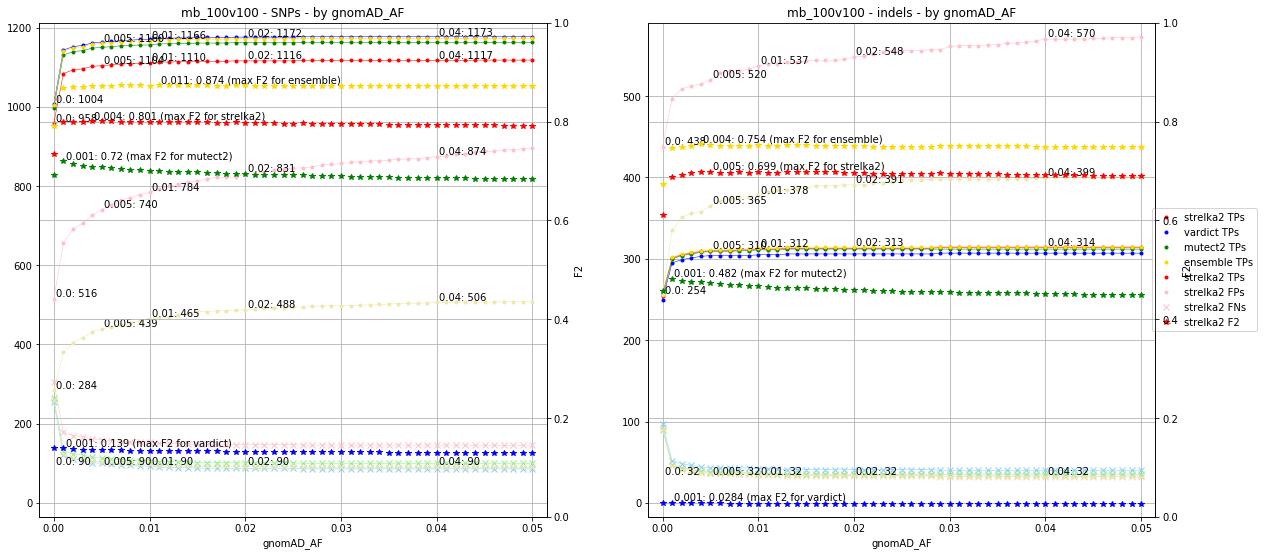

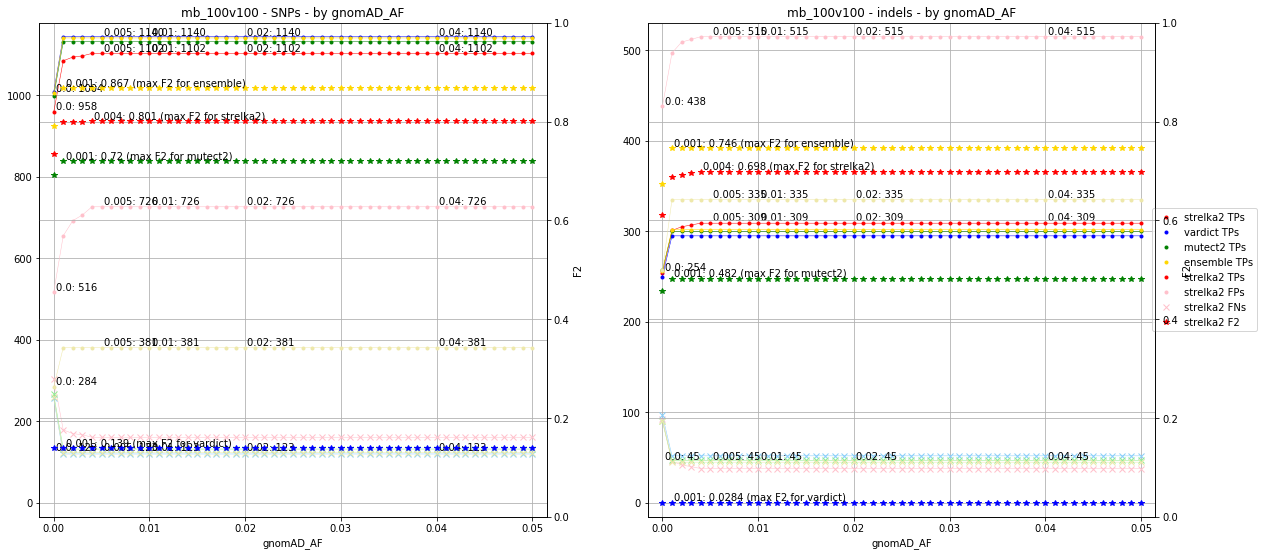

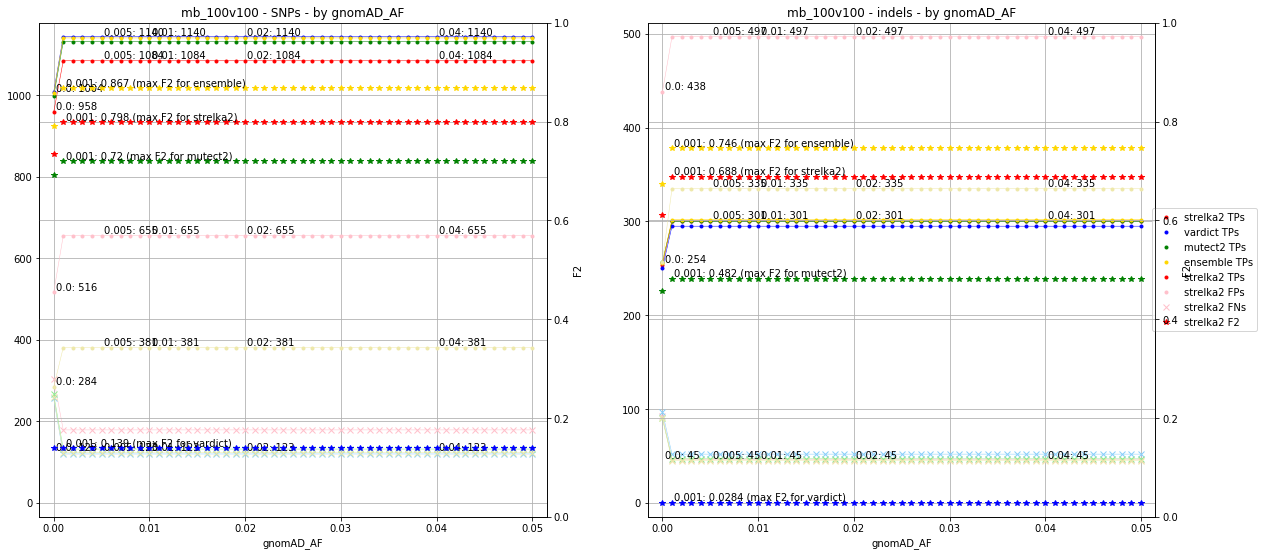

In [28]:
plot_roc('mb_100v100', 'gnomAD_AF', start=0, end=0.05, step=0.001, label_step=0.005, get_filt_qry=[], 
         get_qry=gnomad_freq_qry, skip_fp=['vardict', 'mutect2'])

plot_roc('mb_100v100', 'gnomAD_AF', start=0, end=0.05, step=0.001, label_step=0.005, get_filt_qry=[gnomad_filt1], 
         get_qry=gnomad_freq_qry, skip_fp=['vardict', 'mutect2'])

plot_roc('mb_100v100', 'gnomAD_AF', start=0, end=0.05, step=0.001, label_step=0.005, get_filt_qry=[gnomad_filt2], 
         get_qry=gnomad_freq_qry, skip_fp=['vardict', 'mutect2'])
pass

Plotting mb_100v100
  SNPs...
SNP: True, c=strelka2: tp=1126, fp=1118, fn=137, fm=0.771655701754386, tp/fp=1.0071556350626119
SNP: True, c=vardict: tp=799, fp=9736, fn=464, fm=0.2563033296978251, tp/fp=0.08206655710764174
SNP: True, c=mutect2: tp=1172, fp=2746, fn=91, fm=0.6532887402452621, tp/fp=0.42680262199563
SNP: True, c=ensemble: tp=1121, fp=200, fn=142, fm=0.8794916052094774, tp/fp=5.605
  indels...
SNP: False, c=strelka2: tp=317, fp=609, fn=30, fm=0.684961106309421, tp/fp=0.5205254515599343
SNP: False, c=vardict: tp=285, fp=9160, fn=62, fm=0.13154250900027695, tp/fp=0.03111353711790393
SNP: False, c=mutect2: tp=316, fp=1928, fn=31, fm=0.43502202643171806, tp/fp=0.16390041493775934
SNP: False, c=ensemble: tp=306, fp=225, fn=41, fm=0.7972902553413237, tp/fp=1.36


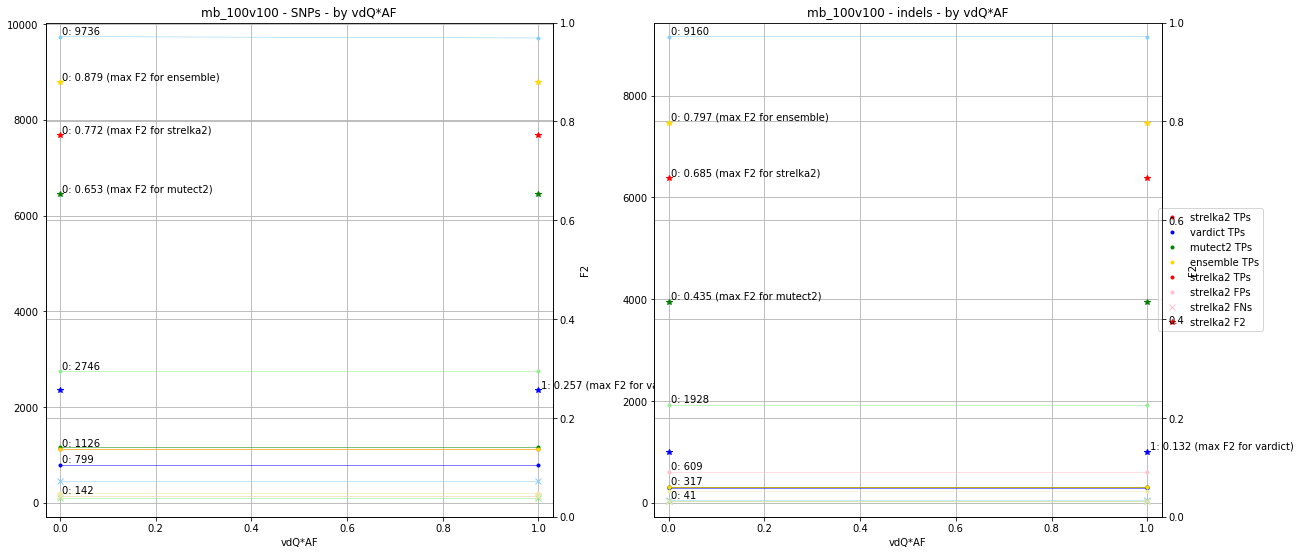

In [23]:
def pon_filt(c, issnp=False):
    if c == 'mutect2' or c == 'vardict':
        return f'PoN_CNT<={0 if issnp else 1}'

def vd_filt_af(c, issnp):
    if c == 'vardict':
        return 'tier<5 or (vardict_INFO_QUAL * TUMOR_AF) >= 10'

# Threshold of 10 shows to be a reasonable one:
plot_roc('mb_100v100', 'vdQ*AF', start=0, end=1, step=1, label_step=4, get_qry=q_af, get_filt_qry=[vd_filt_af])
#plot_roc('mb_300v50',  'vdQ*AF', start=0, end=41, step=1, label_step=4, get_qry=q_af, get_filt_qry=[vd_filt_af])
#plot_roc('colo_tgen',  'vdQ*AF', start=0, end=41, step=1, label_step=4, get_qry=q_af, get_filt_qry=[pon_filt, vd_filt_af])
pass

Plotting mb_100v100
  SNPs...
SNP: True, c=strelka2: tp=1126, fp=1118, fn=137, fm=0.771655701754386, tp/fp=1.0071556350626119
SNP: True, c=vardict: tp=795, fp=9570, fn=468, fm=0.2578322630862036, tp/fp=0.08307210031347963
SNP: True, c=mutect2: tp=1172, fp=2746, fn=91, fm=0.6532887402452621, tp/fp=0.42680262199563
SNP: True, c=ensemble: tp=1121, fp=199, fn=142, fm=0.8796296296296297, tp/fp=5.633165829145729
  indels...
SNP: False, c=strelka2: tp=317, fp=609, fn=30, fm=0.684961106309421, tp/fp=0.5205254515599343
SNP: False, c=vardict: tp=285, fp=9099, fn=62, fm=0.13228741180839212, tp/fp=0.03132212331025387
SNP: False, c=mutect2: tp=316, fp=1928, fn=31, fm=0.43502202643171806, tp/fp=0.16390041493775934
SNP: False, c=ensemble: tp=306, fp=225, fn=41, fm=0.7972902553413237, tp/fp=1.36
Plotting colo_tgen
  SNPs...
SNP: True, c=strelka2: tp=35136, fp=11718, fn=407, fm=0.9293959561118577, tp/fp=2.9984639016897083
SNP: True, c=vardict: tp=33342, fp=3146, fn=2201, fm=0.933113175864771, tp/fp=10.

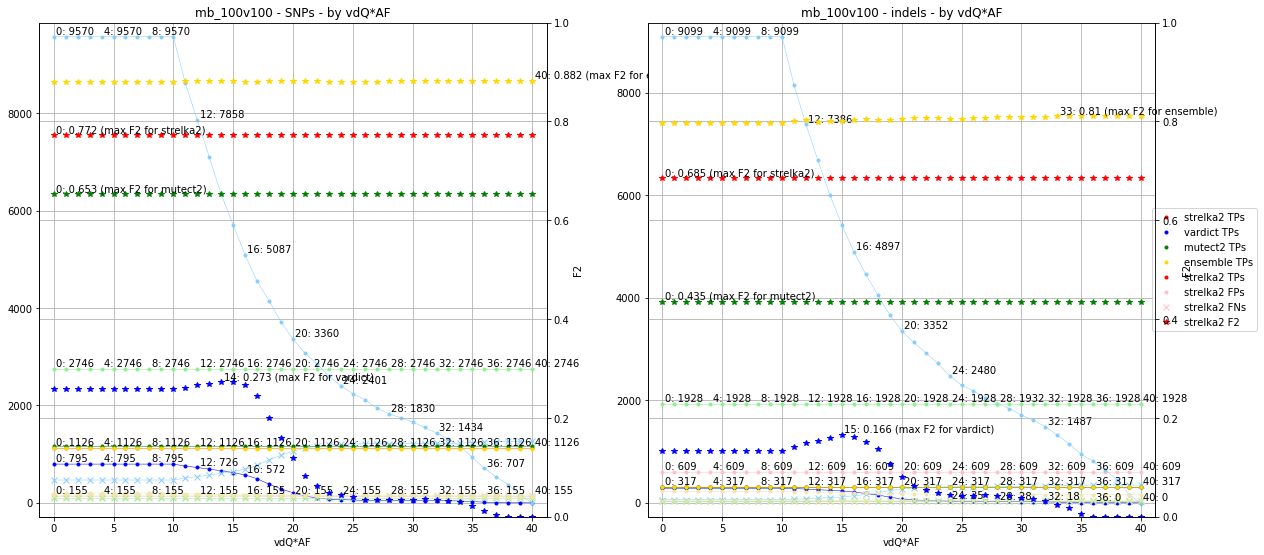

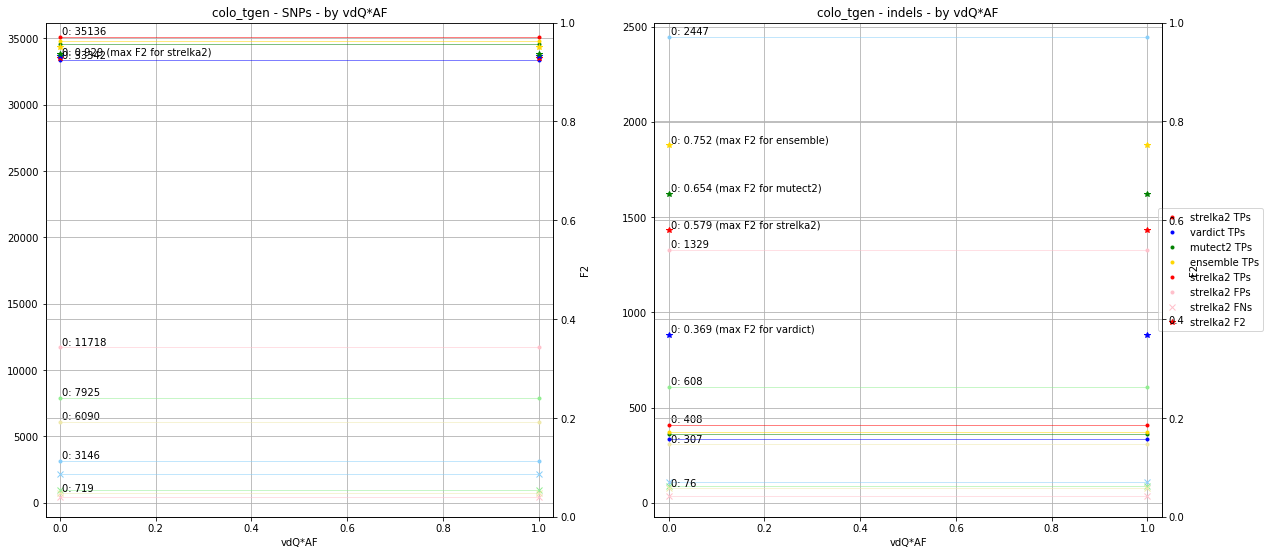

In [22]:
# Keeping vd_filt_af for VarDict ((vardict_INFO_QUAL * TUMOR_AF) >= 10):

def pon_filt(c, issnp=False):
    if c == 'mutect2' or c == 'vardict':
        return f'PoN_CNT<={0 if issnp else 1}'
def vd_filt_af(c, issnp):
    if c == 'vardict':
        return '(vardict_INFO_QUAL * TUMOR_AF) >= 10'

# Threshold of 10 shows to be a reasonable one:
plot_roc('mb_100v100', 'vdQ*AF', start=0, end=1, step=1, label_step=4, get_qry=q_af, get_filt_qry=[vd_filt_af])
#plot_roc('mb_300v50',  'vdQ*AF', start=0, end=1, step=1, label_step=4, get_qry=q_af, get_filt_qry=[vd_filt_af])
plot_roc('colo_tgen',  'vdQ*AF', start=0, end=1, step=1, label_step=4, get_qry=q_af, get_filt_qry=[pon_filt, vd_filt_af])
pass

Plotting mb_100v100
  SNPs...
SNP: True, c=strelka2: tp=1100, fp=352, fn=163, fm=0.8456334563345634
SNP: True, c=vardict: tp=1140, fp=24122, fn=123, fm=0.18803193244045657
SNP: True, c=mutect2: tp=1139, fp=1268, fn=124, fm=0.7635071725432364
SNP: True, c=ensemble: tp=1145, fp=303, fn=118, fm=0.8807692307692309
  indels...
SNP: False, c=strelka2: tp=270, fp=250, fn=77, fm=0.7075471698113207
SNP: False, c=vardict: tp=268, fp=23690, fn=79, fm=0.05286830269075988
SNP: False, c=mutect2: tp=263, fp=590, fn=84, fm=0.5867916108879964
SNP: False, c=ensemble: tp=270, fp=228, fn=77, fm=0.7158006362672323
Plotting mb_100v100
  SNPs...
SNP: True, c=strelka2: tp=1110, fp=683, fn=153, fm=0.8108108108108109
SNP: True, c=vardict: tp=1169, fp=35121, fn=94, fm=0.14138164578394855
SNP: True, c=mutect2: tp=1156, fp=2025, fn=107, fm=0.7020527146848051
SNP: True, c=ensemble: tp=1164, fp=435, fn=99, fm=0.8750563824988724
  indels...
SNP: False, c=strelka2: tp=278, fp=324, fn=69, fm=0.6984924623115577
SNP: Fal

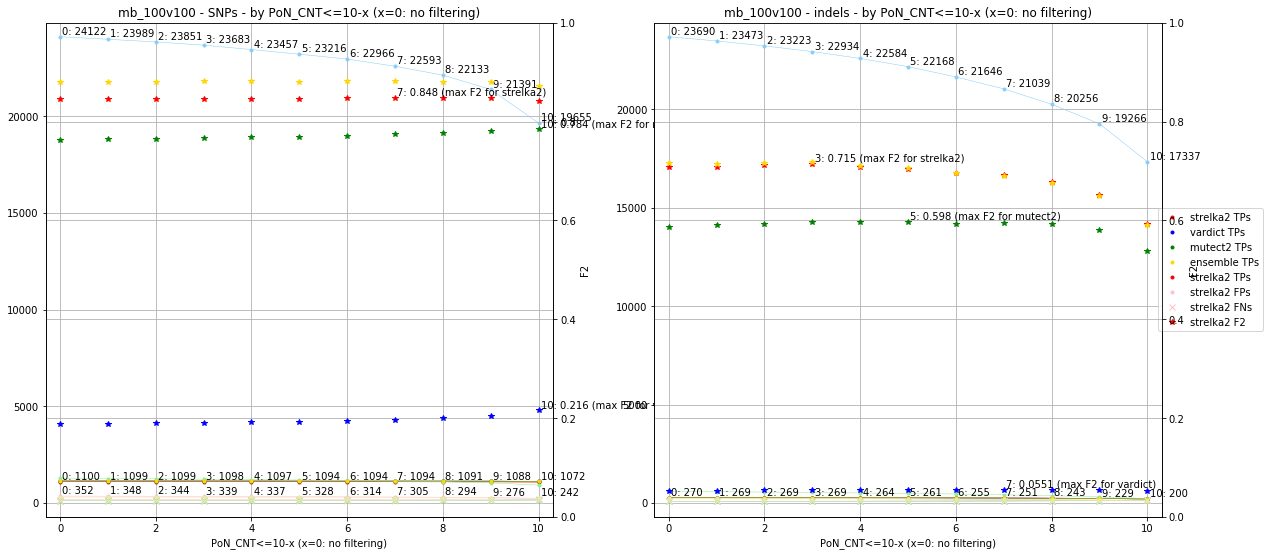

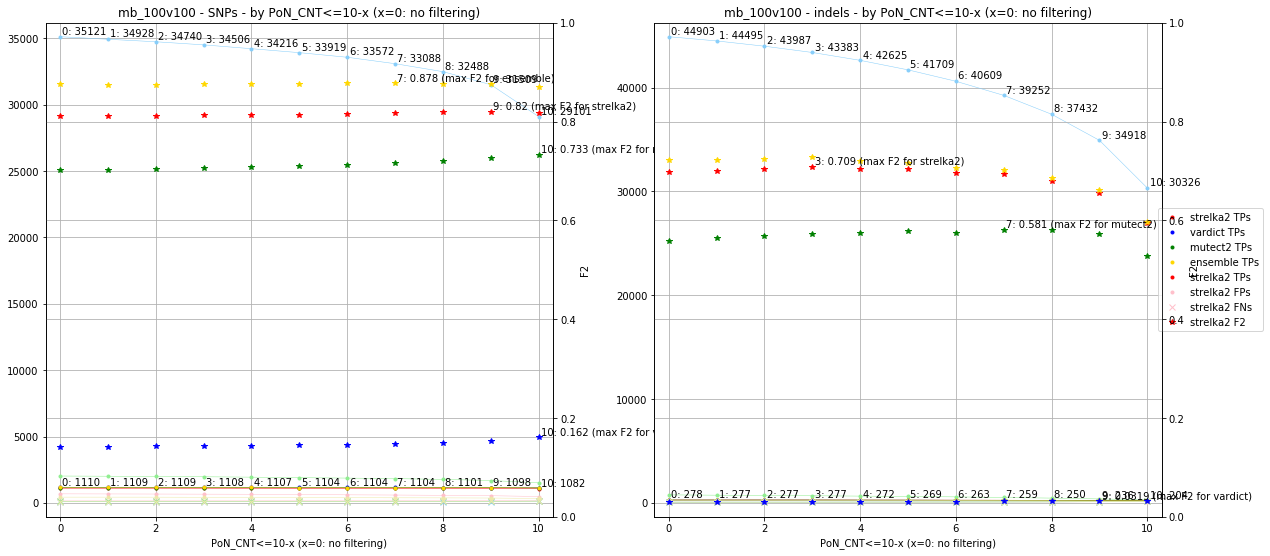

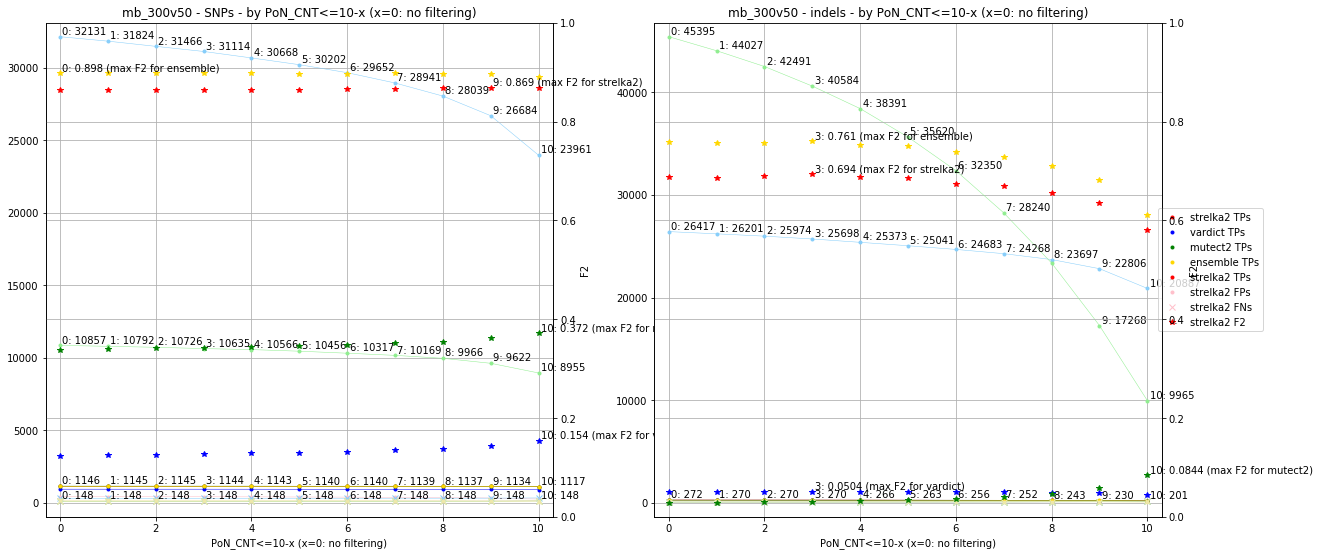

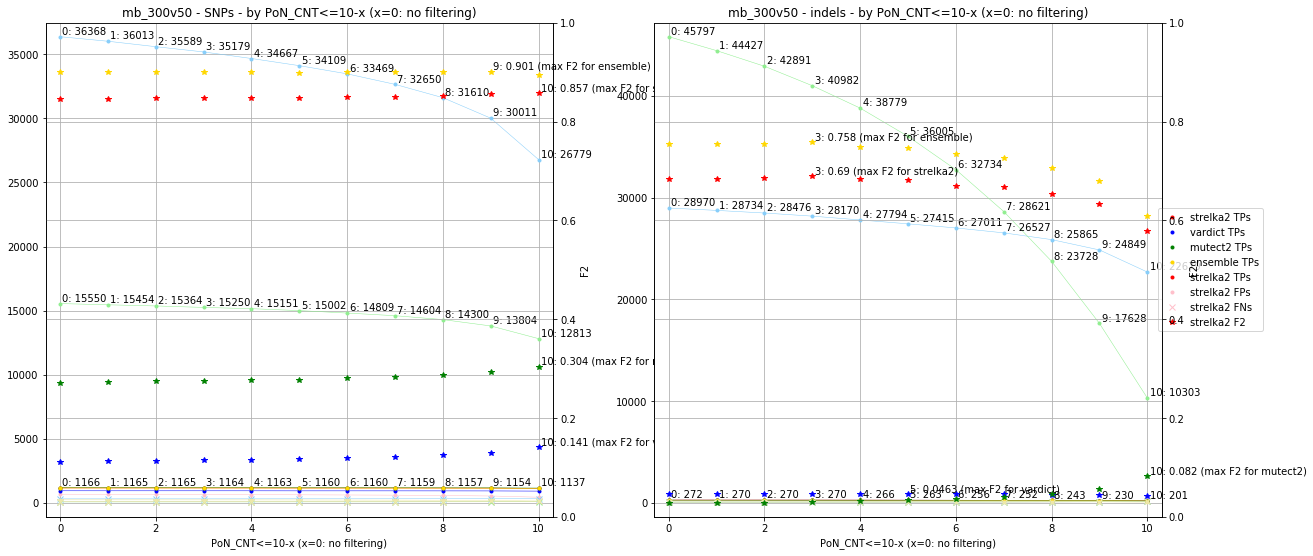

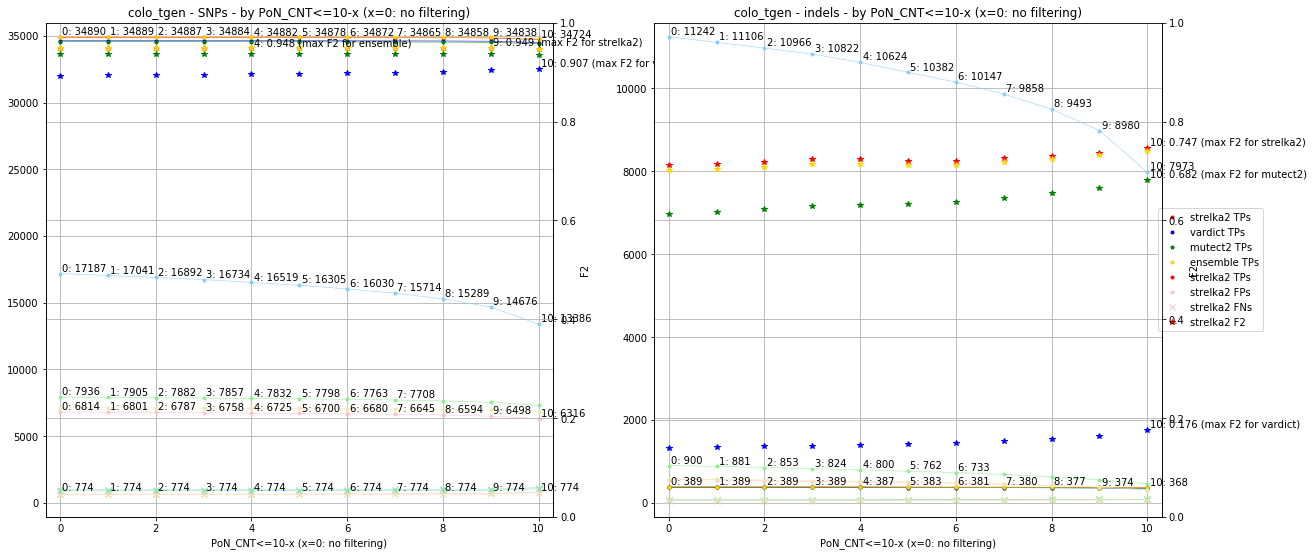

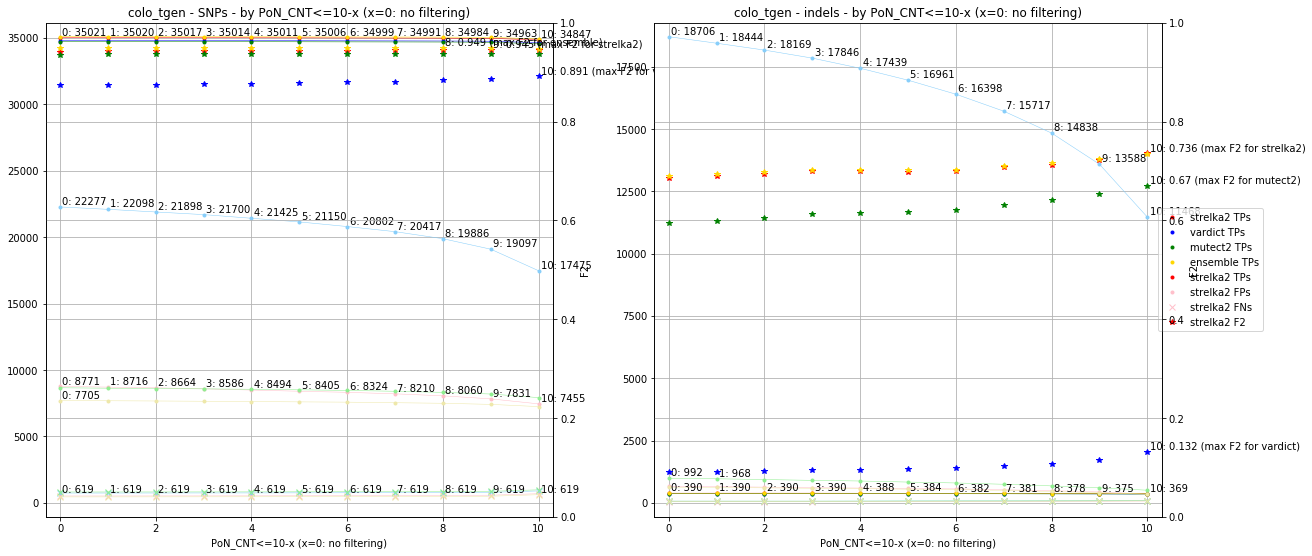

In [36]:
def filt_af_dp(c, issnp):
    return '(TUMOR_AF >= 0.05 & TUMOR_DP >= 25) | GIAB_CONF'
plot_roc('mb_100v100', PON_LBL, start=0, end=MAX_PON, step=1, label_step=1, get_filt_qry=[filt_af_dp], get_qry=get_pon)
plot_roc('mb_100v100', PON_LBL, start=0, end=MAX_PON, step=1, label_step=1, get_filt_qry=[], get_qry=get_pon)
plot_roc('mb_300v50',  PON_LBL, start=0, end=MAX_PON, step=1, label_step=1, get_filt_qry=[filt_af_dp], get_qry=get_pon)
plot_roc('mb_300v50',  PON_LBL, start=0, end=MAX_PON, step=1, label_step=1, get_filt_qry=[], get_qry=get_pon)
plot_roc('colo_tgen',  PON_LBL, start=0, end=MAX_PON, step=1, label_step=1, get_filt_qry=[filt_af_dp], get_qry=get_pon)
plot_roc('colo_tgen',  PON_LBL, start=0, end=MAX_PON, step=1, label_step=1, get_filt_qry=[], get_qry=get_pon)



TRICKY2=="bad_promoter" and tier==1
Plotting mb_100v100
  SNPs...

/Users/vsaveliev/miniconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3443: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=-0.0, top=0.0
  'bottom=%s, top=%s') % (bottom, top))



SNP: True, c=strelka2: tp=0, fp=0, fn=0, fm=0.0, tp/fp=0
SNP: True, c=vardict: tp=0, fp=0, fn=0, fm=0.0, tp/fp=0
SNP: True, c=mutect2: tp=0, fp=0, fn=0, fm=0.0, tp/fp=0
SNP: True, c=ensemble: tp=0, fp=0, fn=0, fm=0.0, tp/fp=0
  indels...
SNP: False, c=strelka2: tp=0, fp=0, fn=0, fm=0.0, tp/fp=0
SNP: False, c=vardict: tp=0, fp=0, fn=0, fm=0.0, tp/fp=0
SNP: False, c=mutect2: tp=0, fp=0, fn=0, fm=0.0, tp/fp=0
SNP: False, c=ensemble: tp=0, fp=0, fn=0, fm=0.0, tp/fp=0

TRICKY2=="bad_promoter" and tier==2
Plotting mb_100v100
  SNPs...
SNP: True, c=strelka2: tp=0, fp=0, fn=0, fm=0.0, tp/fp=0
SNP: True, c=vardict: tp=0, fp=0, fn=0, fm=0.0, tp/fp=0
SNP: True, c=mutect2: tp=0, fp=0, fn=0, fm=0.0, tp/fp=0
SNP: True, c=ensemble: tp=0, fp=0, fn=0, fm=0.0, tp/fp=0
  indels...
SNP: False, c=strelka2: tp=0, fp=0, fn=0, fm=0.0, tp/fp=0
SNP: False, c=vardict: tp=0, fp=0, fn=0, fm=0.0, tp/fp=0
SNP: False, c=mutect2: tp=0, fp=0, fn=0, fm=0.0, tp/fp=0
SNP: False, c=ensemble: tp=0, fp=0, fn=0, fm=0.0, tp/f

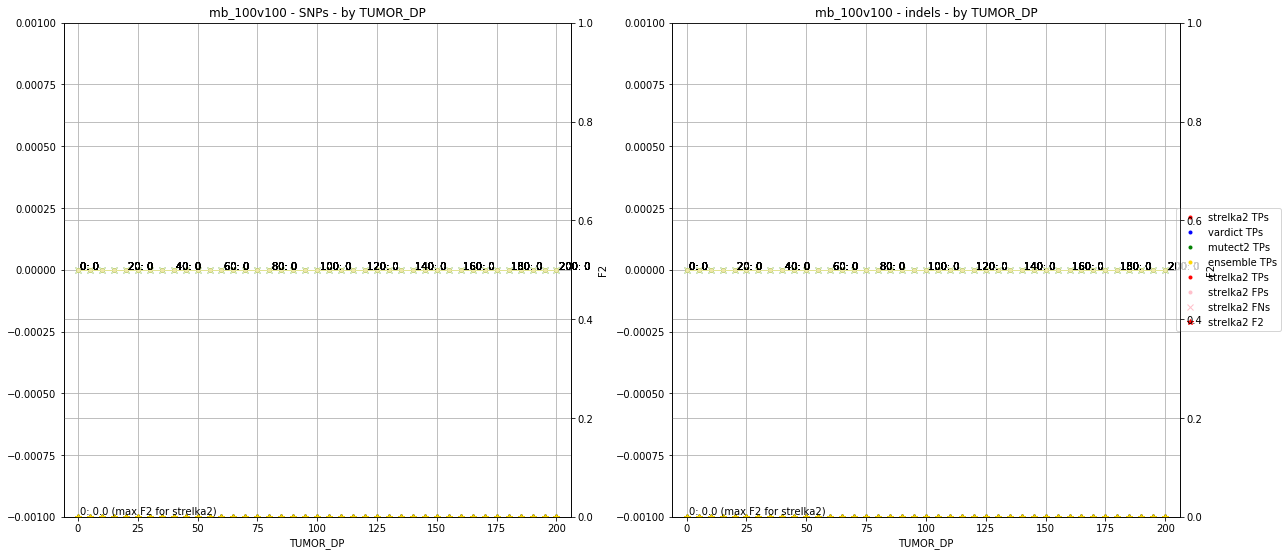

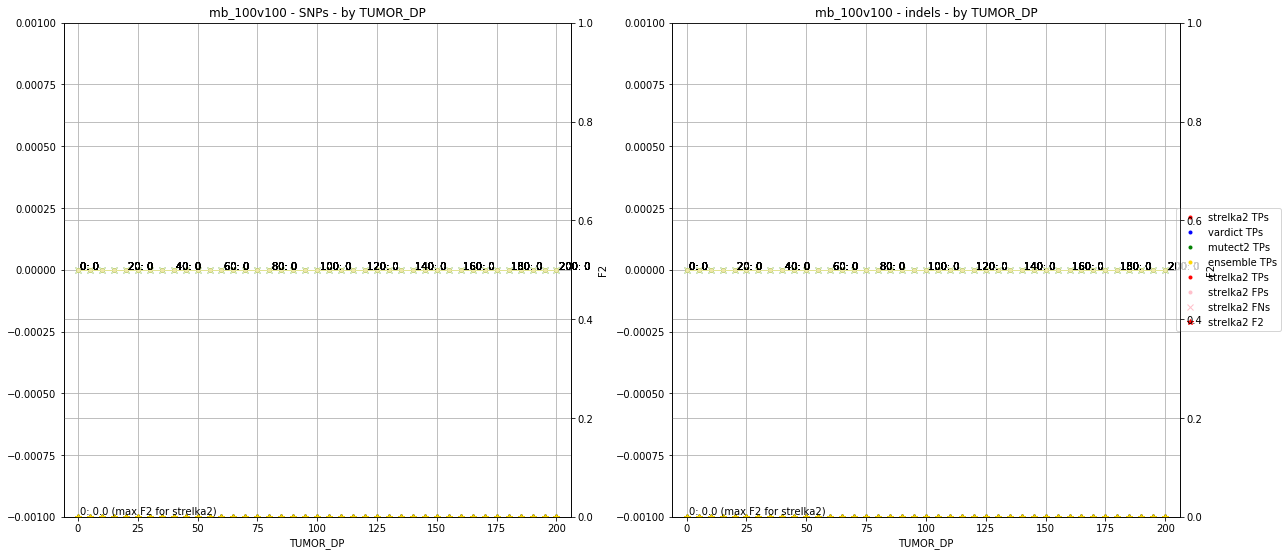

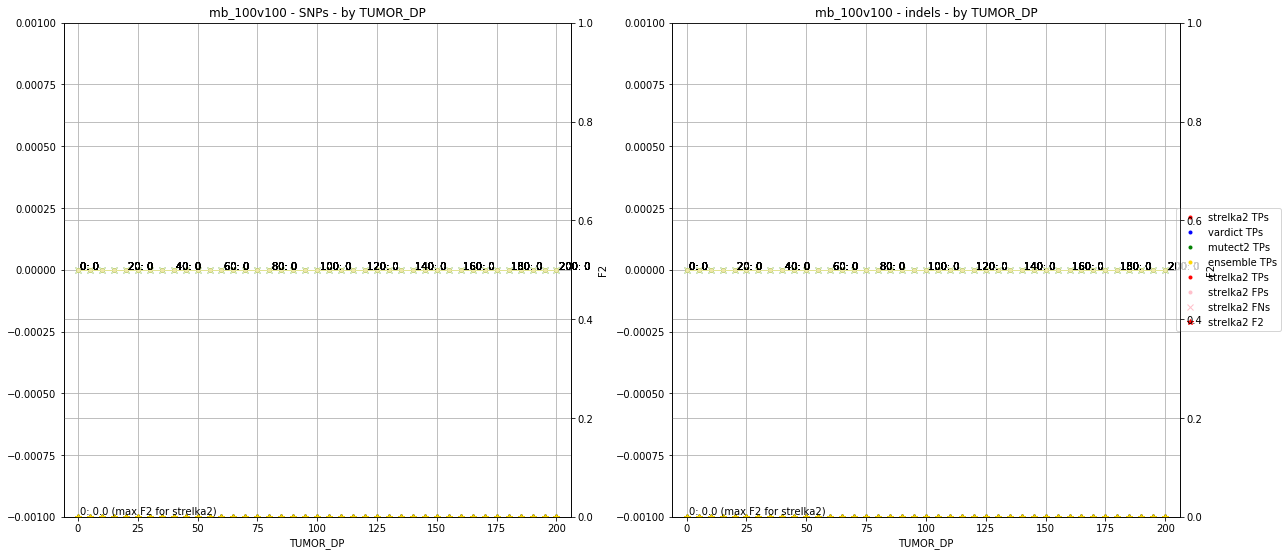

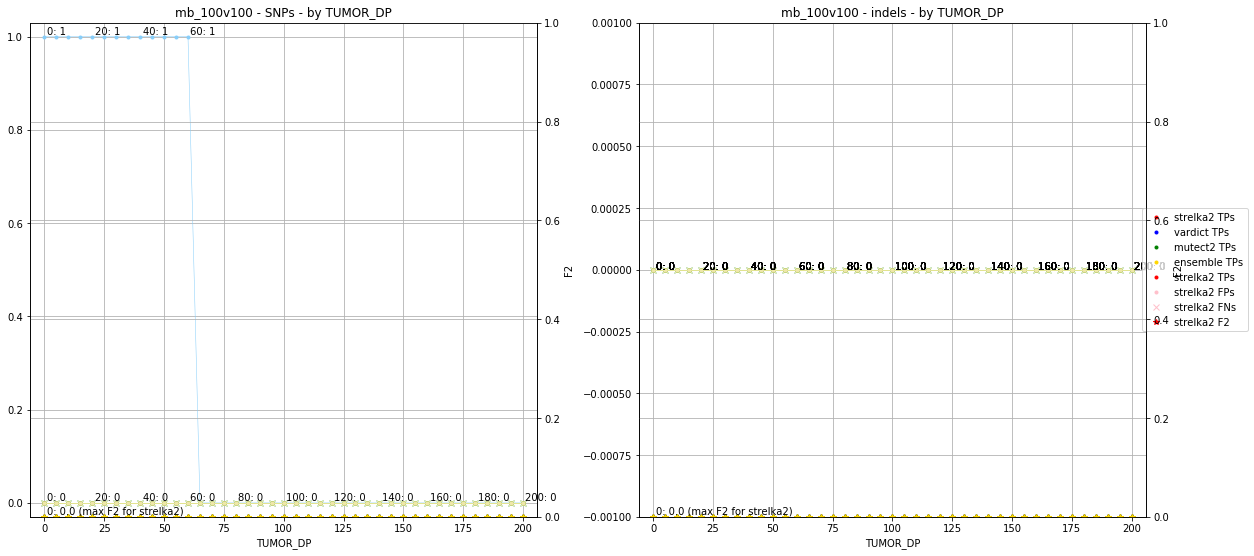

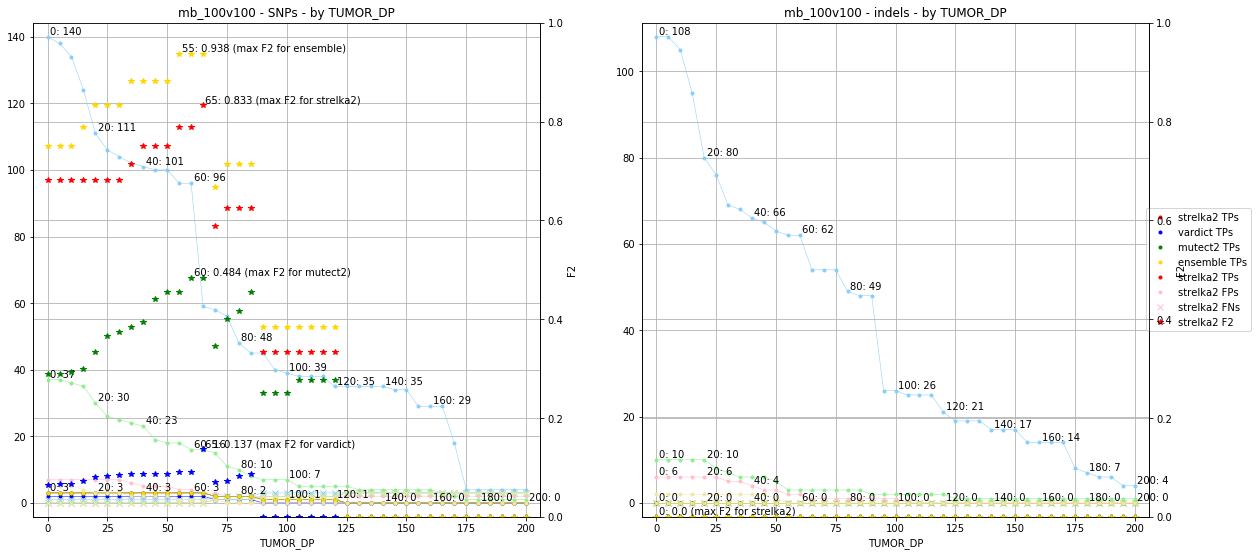

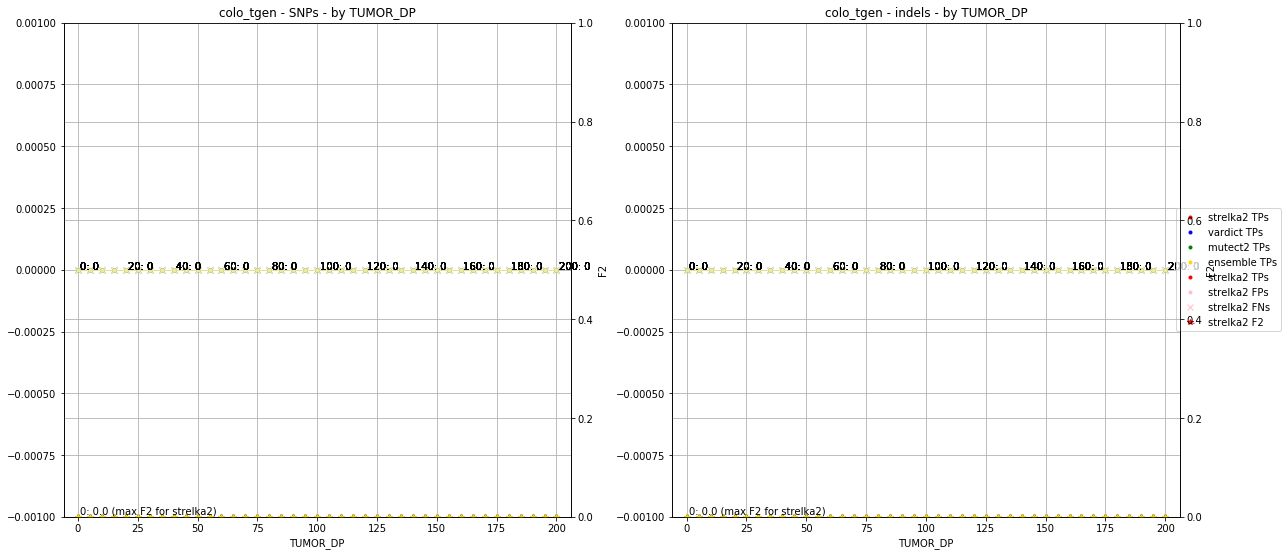

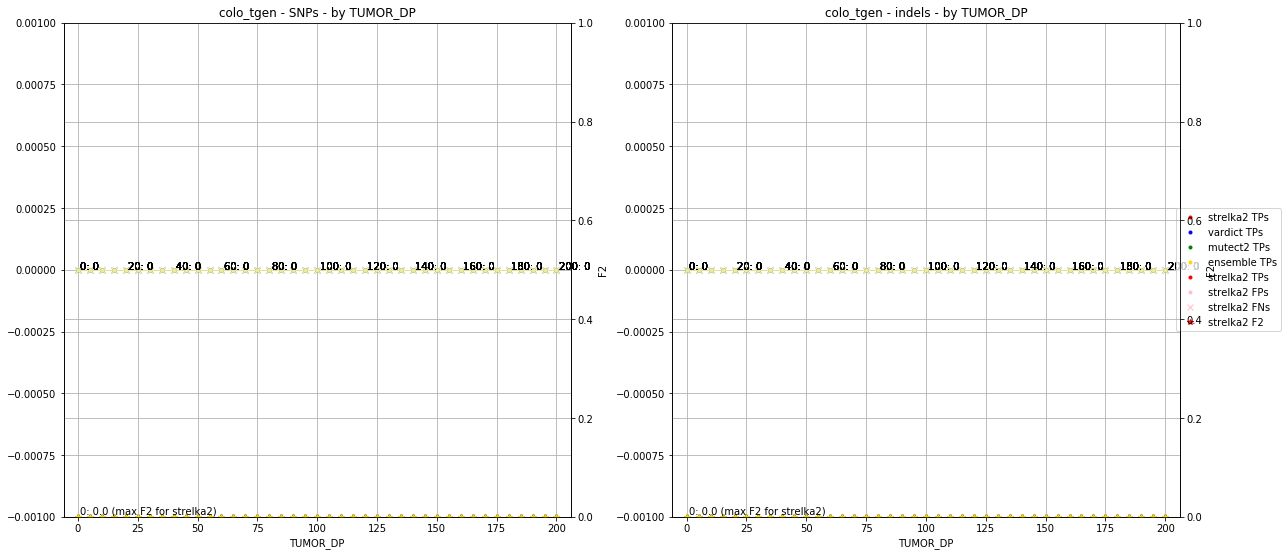

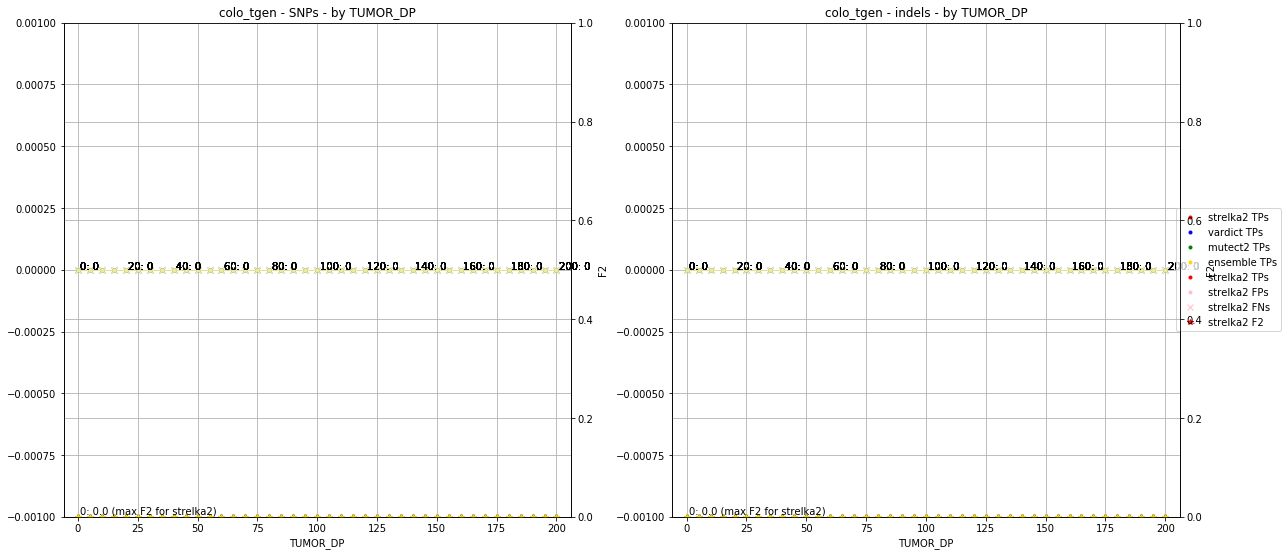

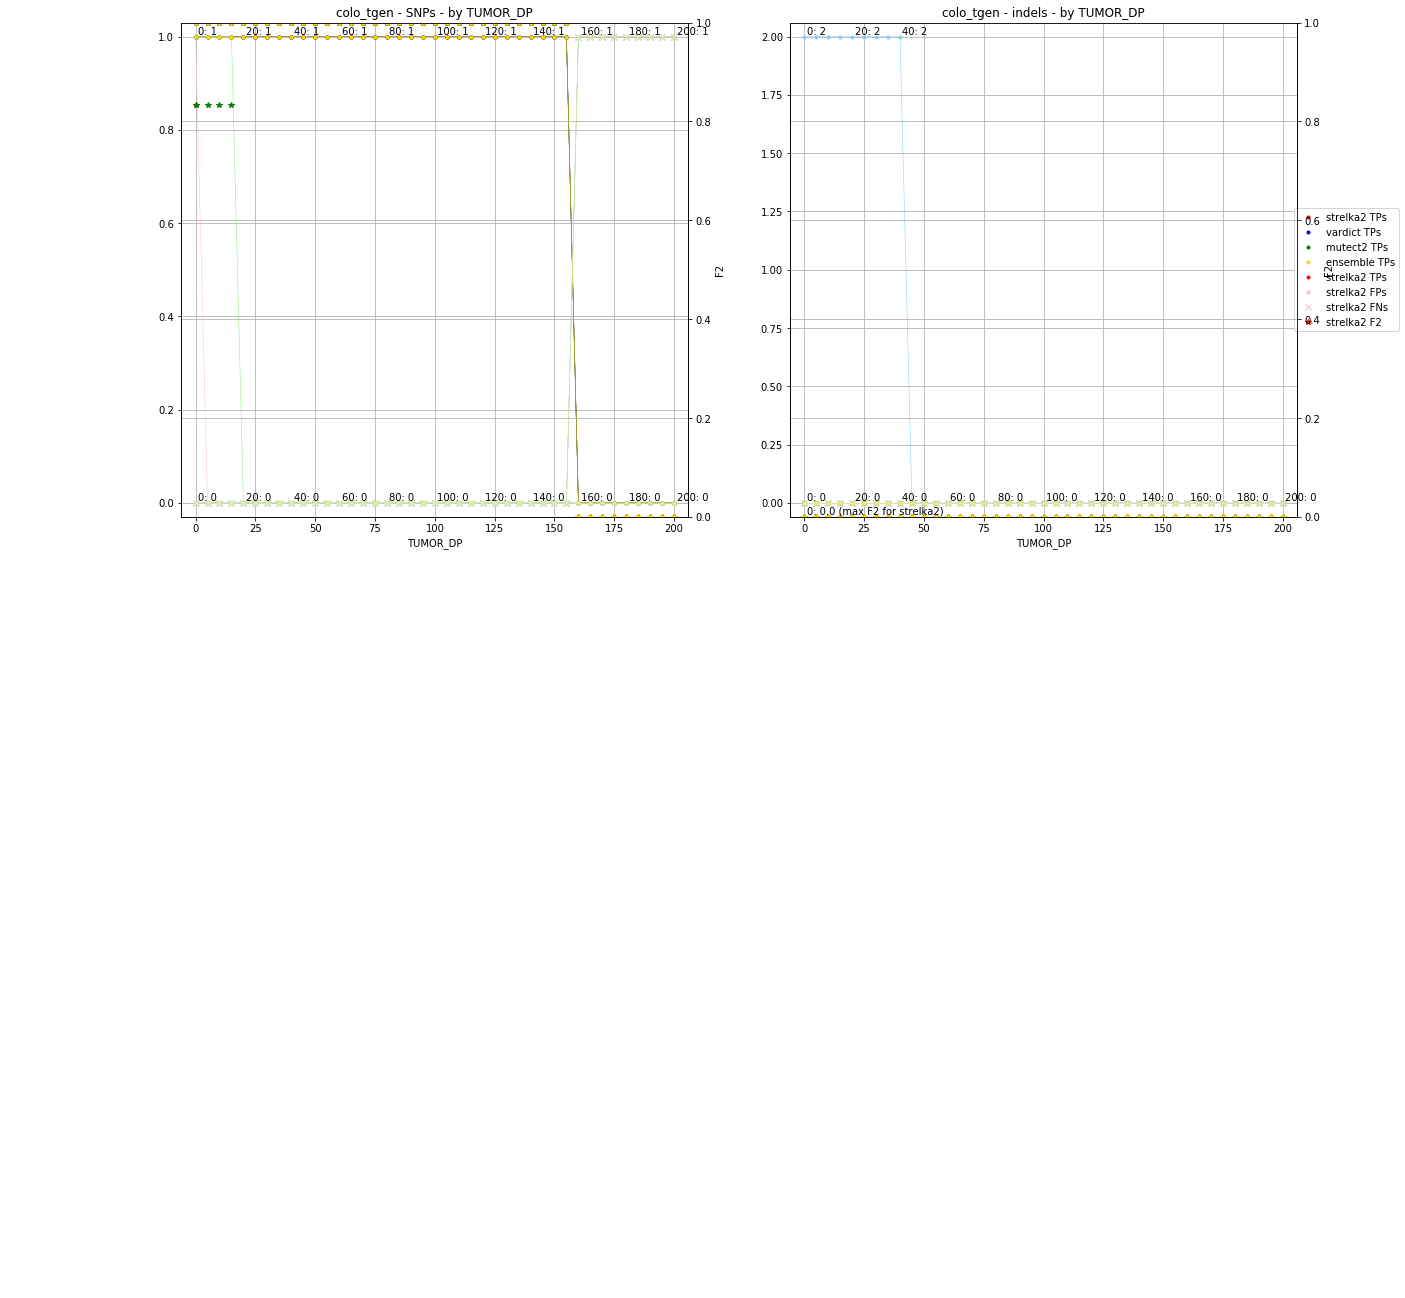

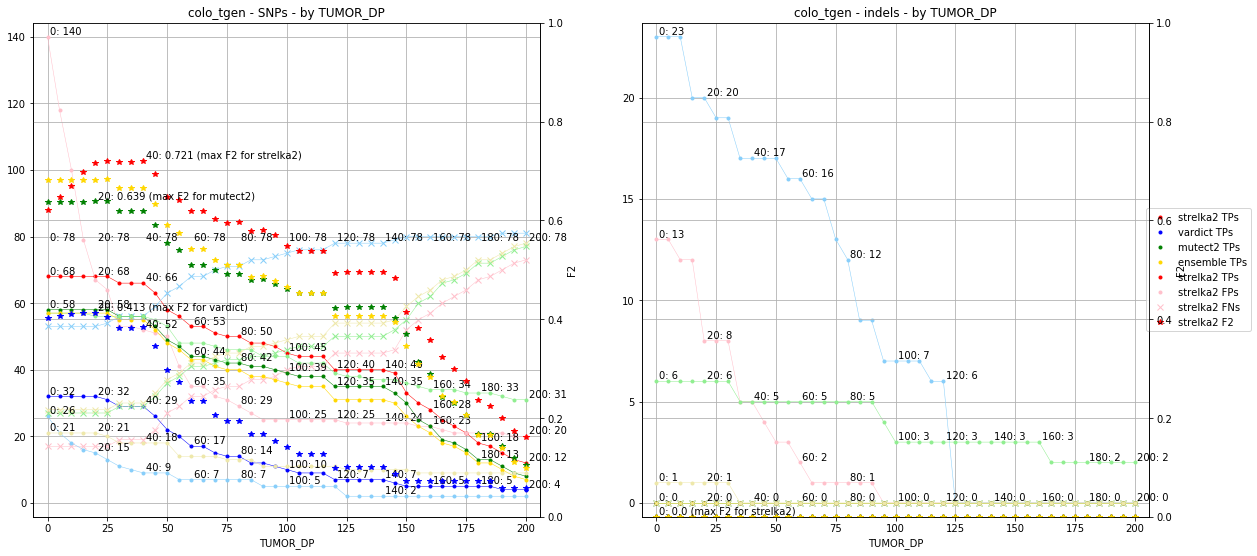

In [30]:
TTs = 'bad_promoter,gc15,gc15to20,gc20to25,gc25to30,gc65to70,gc70to75,gc75to80,gc80to85,gc85,heng_um75-hs37d5,low_complexity_51to200bp,low_complexity_gt200bp,self_chain'.split(',')
def set_tricky2(v):
    tas = v['tricky_anno']
    for TT in TTs:
        if any(ta == TT for ta in tas):
            return TT
    return 0
    
# def set_tricky(v):
#     tas = v['tricky_anno']
#     if all(ta in ['heng_um75-hs37d5', 'self_chain', 'bad_promoter', 'gc20to25', 'gc25to30', 'gc65to70'] for ta in tas):
#         if any(ta == 'heng_um75-hs37d5' for ta in tas):
#             return 3
#         else:
#             return 1
#     elif any(ta for ta in tas):
#         return 0
#     return 2

def qry_cmpl(clr):
    if clr in ['vardict', 'mutect2']:
        return 'Complexity >= {val}'
    else:
        return 'Complexity >= 0'

# def filt_fn(v):
#     cmpl = get_cmpl(v)
#     evs = get_evs(v)
#     return evs > 8

# def _set_field(bn, field, caller):
#     b = benchmark_d[bn]
#     df = df if (df is not None) else benchmark_d[bn]['df']
#     assert df is not None

#     if set_field is not None:
#         df[field] = df.apply(set_field, axis=1)

# plot_roc('mb_100v100', 'Complexity', start=0, end=2, step=1, label_step=1, set_field=set_cmpl_giab, get_qry=qry_cmpl, get_filt_qry=[vd_filt_af])
# plot_roc('mb_300v50',  'Complexity', start=0, end=2, step=1, label_step=1, set_field=set_cmpl_giab, get_qry=qry_cmpl, get_filt_qry=[vd_filt_af])
# plot_roc('colo_tgen',  'Complexity', start=0, end=2, step=1, label_step=1, set_field=set_cmpl_giab, get_qry=qry_cmpl, get_filt_qry=[pon_filt, vd_filt_af])

# plot_roc('mb_100v100', 'Complexity', start=0, end=2, step=1, label_step=1, set_field=set_cmpl_giab, get_filt_qry=[vd_filt_af])
# plot_roc('mb_300v50',  'Complexity', start=0, end=2, step=1, label_step=1, set_field=set_cmpl_giab, get_filt_qry=[vd_filt_af])
# plot_roc('colo_tgen',  'Complexity', start=0, end=2, step=1, label_step=1, set_field=set_cmpl_giab, get_filt_qry=[pon_filt, vd_filt_af])

for bn in ['mb_100v100', 'colo_tgen']:
    df = benchmark_d[bn]['df']
    df['TRICKY2'] = df.apply(set_tricky2, axis=1)

#     plot_roc(bn, 'TUMOR_AF', start=0, end=1, step=1, label_step=1, 
#         get_filt_qry=[vd_filt_af] + ([pon_filt] if bn == 'colo_tgen' else []))
    
#     for region_qry in [
#             'GIAB_CONF or not GIAB_CONF',
#             'IN_CANCER_GENE==True',
#             'IN_CANCER_GENE==True | GIAB_CONF',
#             'IN_CANCER_GENE==True | GIAB_CONF | TRICKY>=1',
#             ]:
#         print(region_qry)
#         plot_roc(bn, 'TUMOR_DP', start=0, end=200, step=5, label_step=20, 
#             get_filt_qry=[vd_filt_af] + ([pon_filt] if bn == 'colo_tgen' else []),
#             df=df.query(region_qry))
    
    region_qrys = []
#     for tt in TTs:
#         region_qrys.append(f'TRICKY2=="{tt}"')
    region_qrys.extend([
        'TRICKY2=="bad_promoter" and tier==1',
        'TRICKY2=="bad_promoter" and tier==2',
        'TRICKY2=="bad_promoter" and tier==3',
        'TRICKY2=="bad_promoter" and tier==4',
        'TRICKY2=="bad_promoter" and tier==5',
#         'GIAB_CONF',
#         'not GIAB_CONF',
#         'tier<5',
    ])
    for region_qry in region_qrys:
        print('')
        print(region_qry)
        plot_roc(bn, 'TUMOR_DP', start=0, end=200, step=5, label_step=20, 
            get_filt_qry=[vd_filt_af] + ([pon_filt] if bn == 'colo_tgen' else []),
            df=df.query(region_qry))
    print('')
    print('')

# plot_roc('mb_100v100', 'Complexity', start=0, end=2, step=1, label_step=1, set_field=set_cmpl_giab, get_qry=qry_cmpl, get_filt_qry=[vd_filt_af])
# plot_roc('mb_300v50',  'Complexity', start=0, end=2, step=1, label_step=1, set_field=set_cmpl_giab, get_qry=qry_cmpl, get_filt_qry=[vd_filt_af])
# plot_roc('colo_tgen',  'Complexity', start=0, end=2, step=1, label_step=1, set_field=set_cmpl_giab, get_qry=qry_cmpl, get_filt_qry=[pon_filt, vd_filt_af])
# plot_roc('mb_100v100', 'Complexity', start=0, end=2, step=1, label_step=1, set_field=set_cmpl_giab, get_filt_qry=[vd_filt_af])
# plot_roc('mb_300v50',  'Complexity', start=0, end=2, step=1, label_step=1, set_field=set_cmpl_giab, get_filt_qry=[vd_filt_af])
# plot_roc('colo_tgen',  'Complexity', start=0, end=2, step=1, label_step=1, set_field=set_cmpl_giab, get_filt_qry=[pon_filt, vd_filt_af])

#plot_roc('mb', 'Complexity', start=0, end=2, step=1, label_step=1, show_values=True, field_fn=get_cmpl)
#plot_roc('mb_100v100', 'Complexity*EVS', start=6, end=20, step=1, label_step=5, field_fn=get_evs, filt_fn=filt_fn)
pass

# TODO:
# types of regions:
# - GIAB confident
# - tricky (level bad and level fine)
# - Cancer genes
# - CACAO regions
# 
# Build VENN diagram of each region
# Build VENN diagram of variants in each region
# Build VENN diagram of TP in each region
# Build VENN diagram of FP in each region
# TP/FP/FN/F2 plots while moving between types of regions:
#    0 - Cancer+CACAO, 1 - GIAB confident (alone or in addition to 0), 2 - no overlap, 3 - tricky level fine (minus 0&1?), 4 - tricky level bad (minus 0&1?)
#
# - Call with 1%
# - Run PCGR annotation (VEP+vcfanno) as well as predispose annotation
# - Tier 1 - keep all 1%
# - Tier 2 - keep 5%
# - Tier 3 - keep 10%
# 
# Next step: keep the vd_filt_af and pon_filt filters, and just follow Hartwig's paper
#
#
# Low FP ratio:
# - GIAB_CONF, TRICKY=1, TRICKY=2 (mb)
#

Plotting mb_100v100
  SNPs...
SNP: True, c=strelka2: tp=1123, fp=1075, fn=140, fm=0.7744827586206896
SNP: True, c=vardict: tp=795, fp=9570, fn=468, fm=0.2578322630862036
SNP: True, c=mutect2: tp=1166, fp=1982, fn=97, fm=0.7109756097560976
SNP: True, c=ensemble: tp=1118, fp=196, fn=145, fm=0.8781024191014768
  indels...
SNP: False, c=strelka2: tp=317, fp=598, fn=30, fm=0.6882327399044725
SNP: False, c=vardict: tp=285, fp=9099, fn=62, fm=0.13228741180839212
SNP: False, c=mutect2: tp=316, fp=1867, fn=31, fm=0.4424530943713245
SNP: False, c=ensemble: tp=306, fp=225, fn=41, fm=0.7972902553413237


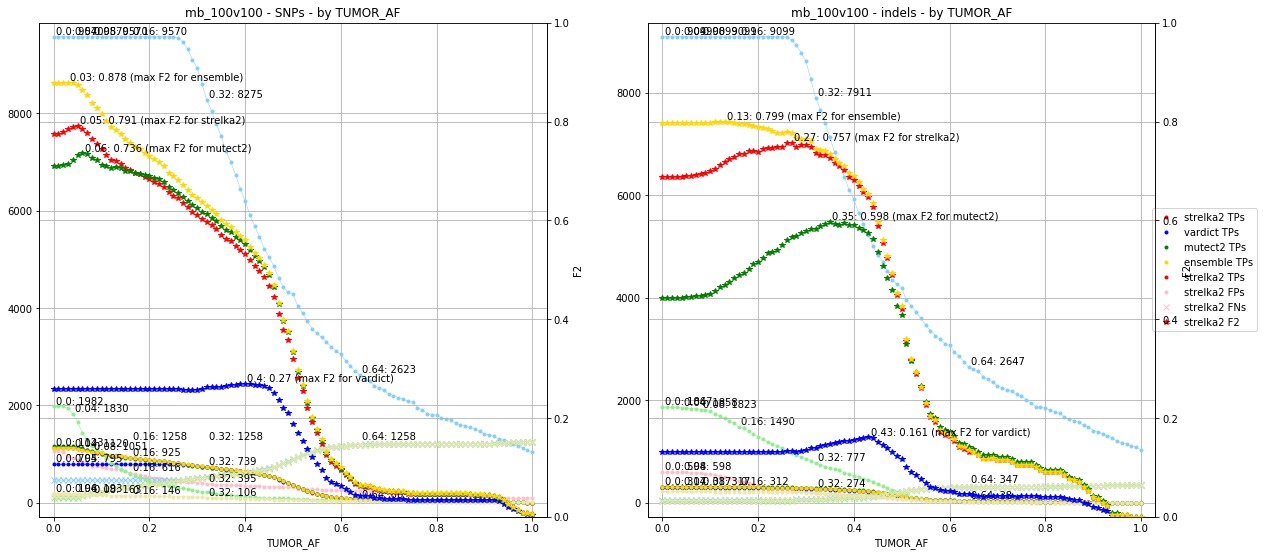

In [49]:
def cmpl_filt_qry(clr, issnp):
    return 'GIAB_CONF | TUMOR_AF>=0.1 | TRICKY==2'

plot_roc('mb_100v100', 'TUMOR_AF', start=0, end=1, step=0.01, label_step=0.02, get_filt_qry=[vd_filt_af, cmpl_filt_qry]          )
#plot_roc('mb_300v50',  'TUMOR_AF', start=0, end=1, step=0.01, label_step=0.02, get_filt_qry=[vd_filt_af, cmpl_filt_qry]          )
#plot_roc('colo_tgen',  'TUMOR_AF', start=0, end=1, step=0.01, label_step=0.02, get_filt_qry=[pon_filt, vd_filt_af, cmpl_filt_qry])


Plotting mb_100v100
  SNPs...
SNP: True, c=strelka2: tp=1126, fp=1118, fn=137, fm=0.771655701754386
SNP: True, c=vardict: tp=795, fp=9570, fn=468, fm=0.2578322630862036
SNP: True, c=mutect2: tp=1172, fp=2746, fn=91, fm=0.6532887402452621
SNP: True, c=ensemble: tp=1121, fp=199, fn=142, fm=0.8796296296296297
  indels...
SNP: False, c=strelka2: tp=317, fp=609, fn=30, fm=0.684961106309421
SNP: False, c=vardict: tp=285, fp=9099, fn=62, fm=0.13228741180839212
SNP: False, c=mutect2: tp=316, fp=1928, fn=31, fm=0.43502202643171806
SNP: False, c=ensemble: tp=306, fp=225, fn=41, fm=0.7972902553413237


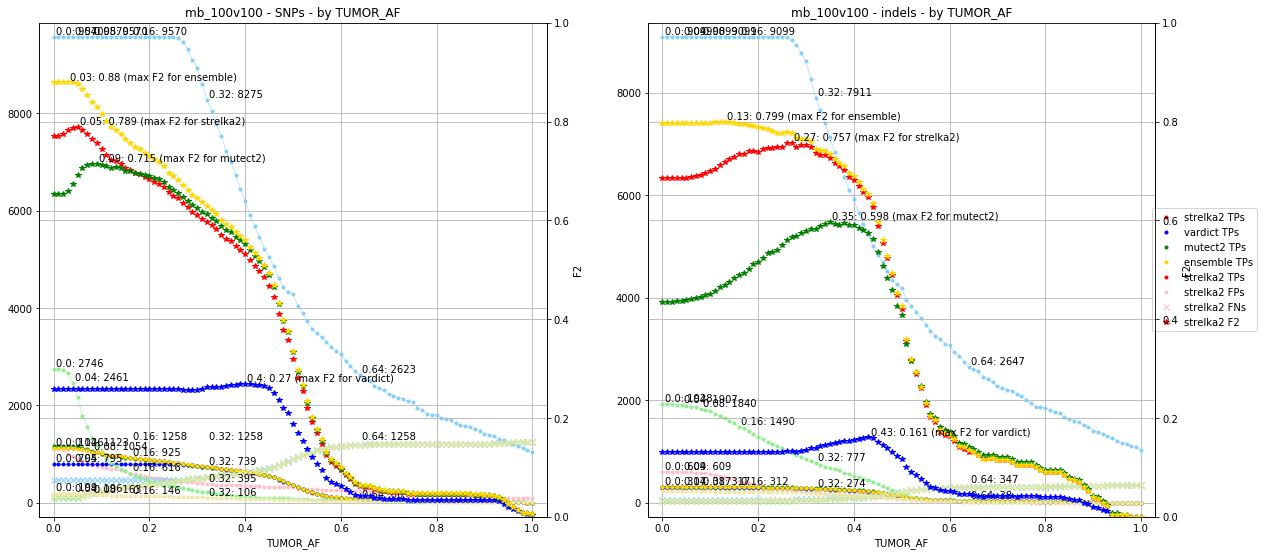

In [48]:
plot_roc('mb_100v100', 'TUMOR_AF', start=0, end=1, step=0.01, label_step=0.02, get_filt_qry=[vd_filt_af]          )

Plotting mb_100v100
  SNPs...
SNP: True, c=strelka2: tp=1121, fp=1084, fn=142, fm=0.7723577235772359
SNP: True, c=vardict: tp=795, fp=9570, fn=468, fm=0.2578322630862036
SNP: True, c=mutect2: tp=1162, fp=2129, fn=101, fm=0.6963921850653242
SNP: True, c=ensemble: tp=1116, fp=194, fn=147, fm=0.8770826784030177
  indels...
SNP: False, c=strelka2: tp=317, fp=597, fn=30, fm=0.6885317115551693
SNP: False, c=vardict: tp=285, fp=9099, fn=62, fm=0.13228741180839212
SNP: False, c=mutect2: tp=316, fp=1880, fn=31, fm=0.44084821428571436
SNP: False, c=ensemble: tp=306, fp=225, fn=41, fm=0.7972902553413237


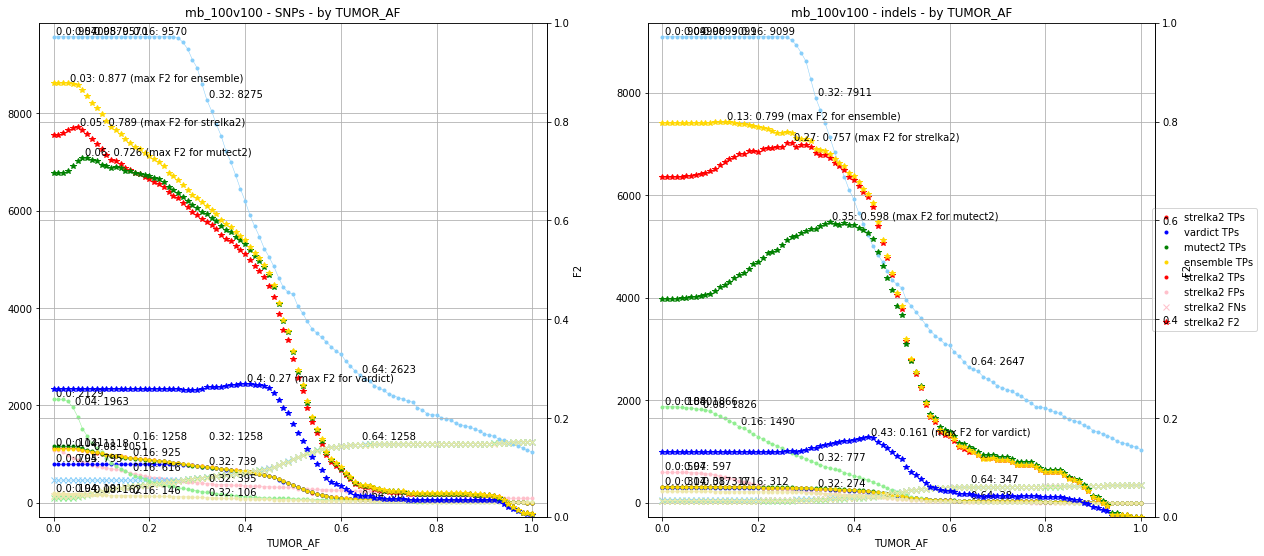

In [46]:
def cmpl_filt_qry(clr, issnp):
    return 'TUMOR_AF>=0.1 | TRICKY>=1'
plot_roc('mb_100v100', 'TUMOR_AF', start=0, end=1, step=0.01, label_step=0.02, get_filt_qry=[vd_filt_af, cmpl_filt_qry])

Plotting mb_100v100
  SNPs...
SNP: True, c=strelka2: tp=1124, fp=1104, fn=139, fm=0.7719780219780219
SNP: True, c=vardict: tp=795, fp=9570, fn=468, fm=0.2578322630862036
SNP: True, c=mutect2: tp=1167, fp=2167, fn=96, fm=0.6958025280228952
SNP: True, c=ensemble: tp=1119, fp=197, fn=144, fm=0.878611809045226
  indels...
SNP: False, c=strelka2: tp=317, fp=601, fn=30, fm=0.6873373807458804
SNP: False, c=vardict: tp=285, fp=9099, fn=62, fm=0.13228741180839212
SNP: False, c=mutect2: tp=316, fp=1884, fn=31, fm=0.44035674470457076
SNP: False, c=ensemble: tp=306, fp=225, fn=41, fm=0.7972902553413237


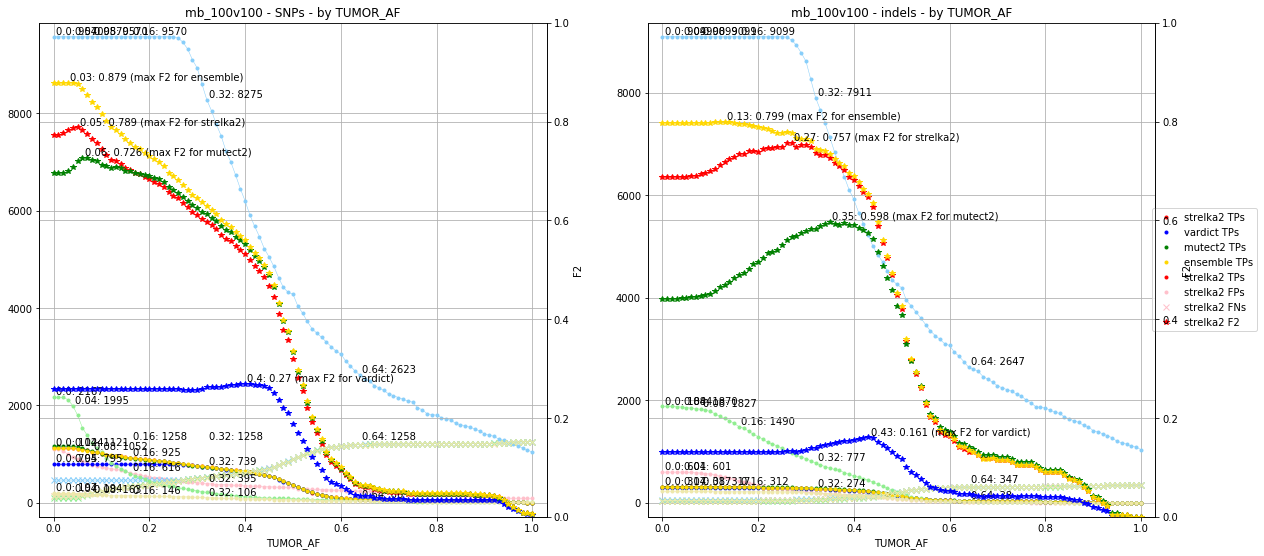

In [47]:
def cmpl_filt_qry(clr, issnp):
    return 'GIAB_CONF | TUMOR_AF>=0.1 | TRICKY>=1'
plot_roc('mb_100v100', 'TUMOR_AF', start=0, end=1, step=0.01, label_step=0.02, get_filt_qry=[vd_filt_af, cmpl_filt_qry])

In [ ]:
def cmpl_filt_qry(clr, issnp):
    return 'TUMOR_AF>=0.1 | TRICKY>=1'
plot_roc('mb_100v100', 'TUMOR_AF', start=0, end=1, step=0.01, label_step=0.02, get_filt_qry=[vd_filt_af, cmpl_filt_qry])

In [42]:
def complexity(v):
    tas = v['tricky_anno']
    cmpl = 2
    if all(ta in ['heng_um75-hs37d5', 'self_chain', 'bad_promoter', 'gc20to25', 'gc25to30', 'gc65to70']
           for ta in tas):
        cmpl = 1
    elif tas:
        cmpl = 0
    return cmpl
   
def filt_fn(v):
    cmpl = get_cmpl(v)
    evs = get_evs(v)
    return  evs > 8

#plot_roc('mb', 'Complexity', start=0, end=2, step=1, label_step=1, show_values=True, field_fn=get_cmpl)
#plot_roc('mb_100v100', 'Complexity*EVS', start=6, end=20, step=1, label_step=5, field_fn=get_evs, filt_fn=filt_fn)
pass

# Venn

In [213]:
# Counting statistics on per-chromosome basis: unique to BWA vs. unqiue to minimap2 vs. 
# common calls. Drawing summary Venn diagrams for each caller and aligner:
# 
# mm2/bwa ensemble    tp-snp  tp-ind  fp-snp  fp-ind  fn-snp  fn-ind 
# mm2/bwa strelka2    --//--  --//--
# mm2/bwa mutect2     --//--
# mm2/bwa vardict
# v/s/m bwa  
# v/s/m mm2            

from matplotlib_venn import venn2, venn3
from matplotlib import gridspec
import itertools
import math

criteria_name = 'PoN_CNT'
rows_criterias = [1, 2, 3, math.inf]
criteria_op = '<'

def plot_venn(bn, df=None):
    b = benchmark_d[bn]
    df = df if (df is not None) else benchmark_d[bn]['df']

    validation_types = ['tp', 'fp', 'fn']
    event_types = [True, False]  # SNP, non-SNP

    rows_cnt = len(rows_criterias)
    figsize = (18, 3.6*rows_cnt)
    fig = plt.figure(figsize=figsize)
    outer = gridspec.GridSpec(1 + rows_cnt, 
                              1 + len(event_types),
                              height_ratios=[1] + [7]*rows_cnt,
                              width_ratios=[1] + [2*len(validation_types)] * len(event_types))
                              
    def left_col_label(txt, ax):
        plt.text(0, 0.5, txt,
            fontsize=16,
            horizontalalignment='left',
            verticalalignment='center')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)     
        plt.axis('off')
            
    # HEADER
    for is_snp_i, is_snp in enumerate(event_types):
        inner = gridspec.GridSpecFromSubplotSpec(1, len(validation_types), 
                                                 subplot_spec=outer[0, 1 + is_snp_i])
        lbl = 'SNP' if is_snp else 'Indel'
        for typ_i, typ in enumerate(validation_types):
            ax = plt.subplot(inner[typ_i])
            plt.text(0.5, -0.5, f'{lbl}, {typ}',
                fontsize=14,
                horizontalalignment='center',
                verticalalignment='bottom',
            )
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)     
            plt.axis('off')

    # 2-way L vs R, one raw for a criteria
    for criteria_i, criteria in enumerate(rows_criterias):
        ax = plt.subplot(outer[1 + criteria_i, 0])
        left_col_label(f'{criteria_name}{criteria_op}{criteria}' if criteria is not None else '', ax)

        for is_snp_i, is_snp in enumerate(event_types):
            inner = gridspec.GridSpecFromSubplotSpec(1, len(validation_types), 
                             subplot_spec=outer[1 + criteria_i, 1 + is_snp_i])
            lbl = 'SNP' if is_snp else 'Indel'
            for typ_i, typ in enumerate(validation_types):
#                dbg.set_trace()
                ax = plt.subplot(inner[typ_i])
                #sets = [set(df.query( & is_snp == {is_snp}').index.tolist())]          
                dff = df.query(f'is_snp == {is_snp}')
                if criteria: dff = dff.query(f'{criteria_name}{criteria_op}{criteria}')
                sets = [set(dff.query(f'{p}_typ == "{typ}"').index.tolist()) for p in [venn_left, venn_right]]    
                venn2(sets, set_labels=[l, r], ax=ax)

#     # 3-way Strelka2 vs Mutect vs VarDict, one raw for each aligner
#     clrs = [c for c in b['callers'] if c != 'ensemble']   
#     for aln_i, aln in enumerate(['bwa', 'mm2']):
#         ax = plt.subplot(outer[1 + len(b['callers']) + aln_i, 0])
#         left_col_label(aln, ax)
        
#         for is_snp_i, is_snp in enumerate(event_types):
#             inner = gridspec.GridSpecFromSubplotSpec(1, len(validation_types), 
#                              subplot_spec=outer[1 + len(b['callers']) + aln_i, 1 + is_snp_i])
#             lbl = 'SNP' if is_snp else 'Indel'
#             for typ_i, typ in enumerate(validation_types):
#                 ax = plt.subplot(inner[typ_i])
#                 sets = [set(df.query(f'{aln}_t == "{typ}" & caller == "{clr}" & is_snp == {is_snp}').index.tolist())
#                         for clr in clrs]                
#                 venn3(sets, set_labels=clrs, ax=ax)
                
plot_venn('mb_ds')
plot_venn('mb_300v50')
plot_venn('colo_40pc_ds')
plot_venn('colo_40pc_full')
plot_venn('colo_tgen')